In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%qtconsole
%reload_ext snakeviz
from collections import namedtuple
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm_notebook as tqdm

from src.analysis import (get_all_tetrode_pair_info, merge_symmetric_key_pairs,
                          get_tetrode_pair_group_from_hdf, get_area_pair_from_hdf,
                          get_all_tetrode_info, get_tetrode_pair_from_hdf)
from src.spectral import plot_coherogram, group_delay_over_time
from src.data_processing import make_epochs_dataframe

In [2]:
def plot_coherence_difference_by_area(path, tetrode_pair_info, brain_area_pair_groups,
                                      col_wrap=4, figsize=(12, 9)):
    coherence_name, covariate, difference_level = path
    num_groups = len(brain_area_pair_groups)
    level2, level1 = difference_level.split('_')
    num_rows = int(np.ceil(num_groups / col_wrap))

    fig, axes = plt.subplots(num_rows, col_wrap, figsize=figsize, sharex=True, sharey=True)
    axes = axes.flatten()

    for group_ind, brain_area_pair in enumerate(brain_area_pair_groups):
        group_coherence = get_tetrode_pair_group_from_hdf(
            brain_area_pair_groups[brain_area_pair], coherence_name, covariate, difference_level).mean(axis=0)
        mesh = plot_coherogram(group_coherence, axis_handle=axes[group_ind],
                                        vmin=-0.1, vmax=0.1, cmap='PRGn')
        axes[group_ind].set_title('-'.join(brain_area_pair))
        axes[group_ind].axvline(0, color='black', linestyle=':')
    for ax in axes[num_groups:]:
        ax.axis('off')
    label = '$\longleftarrow$ {level1} $|$ {level2} $\longrightarrow$'.format(level2=level2, level1=level1)
    clb = plt.colorbar(mesh, ax=axes.tolist(), shrink=0.5, orientation='horizontal', label=label)
    clb.ax.set_title('Coherence Difference')
    
    title = '{}\n{}: {}'.format(coherence_name.replace('_', ' ').title(),
                        covariate.replace('_', ' ').title(),
                        difference_level.replace('_', ' - ').title())
    plt.suptitle(title, fontsize=16)
    
def plot_ripple_triggered_by_area(path, tetrode_pair_info, brain_area_pair_groups,
                                      col_wrap=4, figsize=(12, 9)):
    coherence_name, covariate, level = path
    num_groups = len(brain_area_pair_groups)
    num_rows = int(np.ceil(num_groups / col_wrap))

    fig, axes = plt.subplots(num_rows, col_wrap, figsize=figsize, sharex=True, sharey=True)
    axes = axes.flatten()

    for group_ind, brain_area_pair in enumerate(brain_area_pair_groups):
        group_coherence = get_tetrode_pair_group_from_hdf(
            brain_area_pair_groups[brain_area_pair], coherence_name, covariate, level).mean(axis=0)
        mesh = plot_coherogram(group_coherence, axis_handle=axes[group_ind],
                               vmin=-0.1, vmax=0.1, cmap='RdBu_r')
        axes[group_ind].set_title('-'.join(brain_area_pair))
        axes[group_ind].axvline(0, color='black', linestyle=':')
    for ax in axes[num_groups:]:
        ax.axis('off')
    clb = plt.colorbar(mesh, ax=axes.tolist(), shrink=0.5, orientation='horizontal', label='Ripple Coherence')
    clb.ax.set_title('Coherence Difference')
    
    title = '{}\n{}:'.format(coherence_name.replace('_', ' ').title(),
                             covariate.replace('_', ' ').title())
    plt.suptitle(title, fontsize=16)

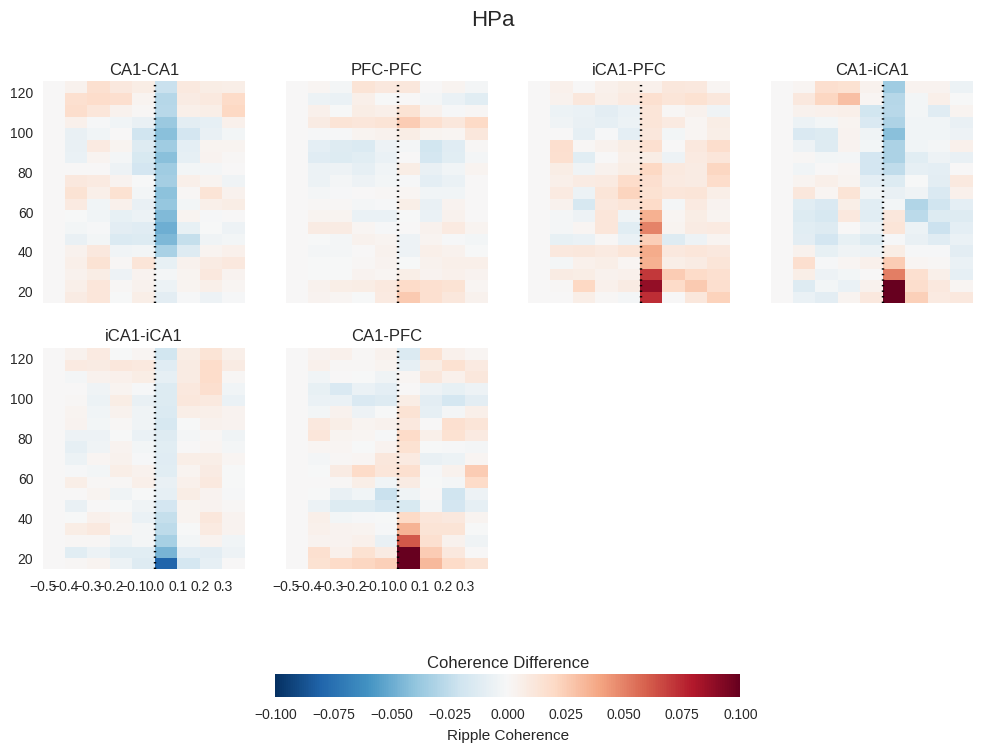

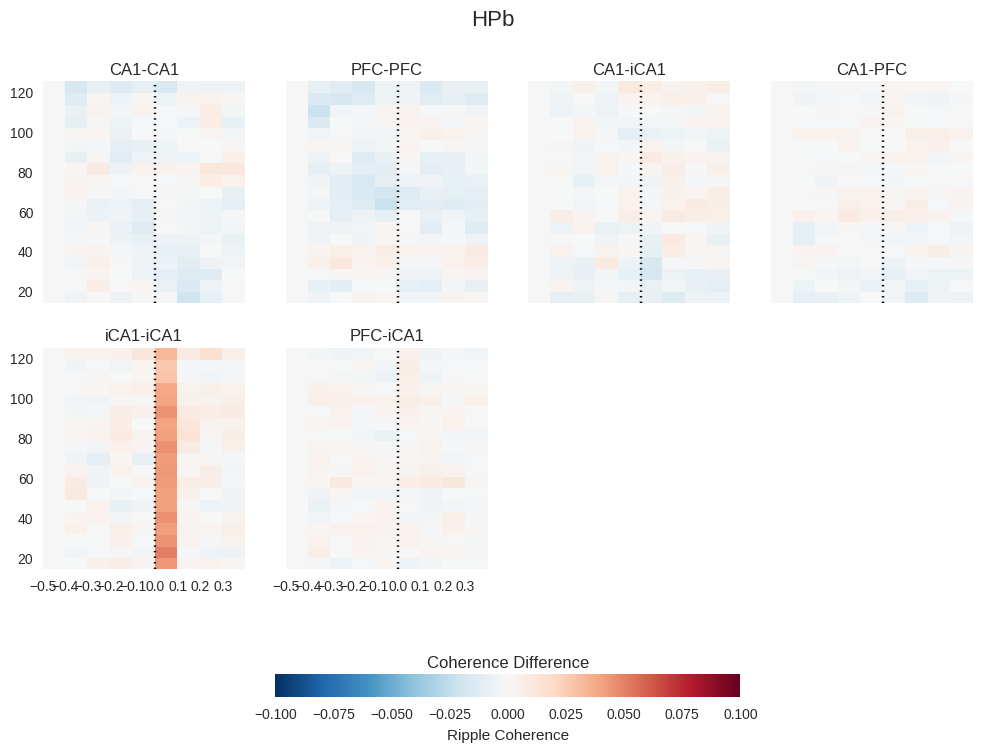

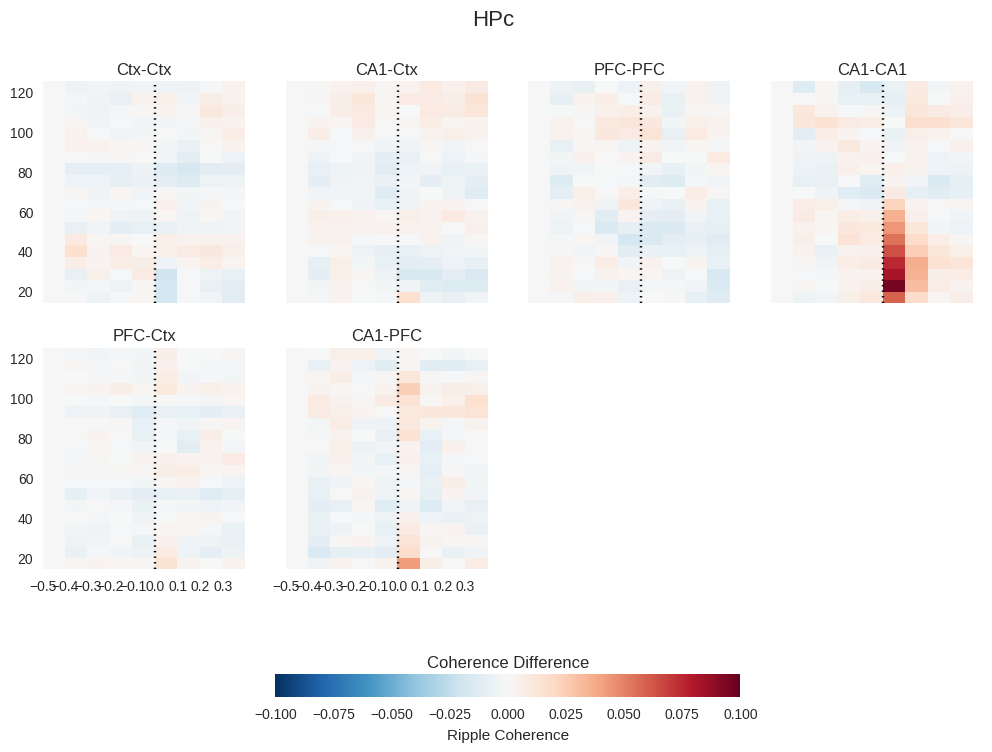

In [9]:
path = ('gamma_frequency_coherence_medFreqRes1', 'all_ripples', 'ripple_difference_from_baseline')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
tetrode_pairs_by_animal = tetrode_pair_info.groupby('animal')

for animal_name, animal_tetrode_pairs in tetrode_pairs_by_animal:
    brain_area_pair_groups = merge_symmetric_key_pairs(
        animal_tetrode_pairs.groupby(['area_1', 'area_2']).groups)
    plot_ripple_triggered_by_area(path, animal_tetrode_pairs, brain_area_pair_groups)
    plt.suptitle(animal_name, fontsize=16)

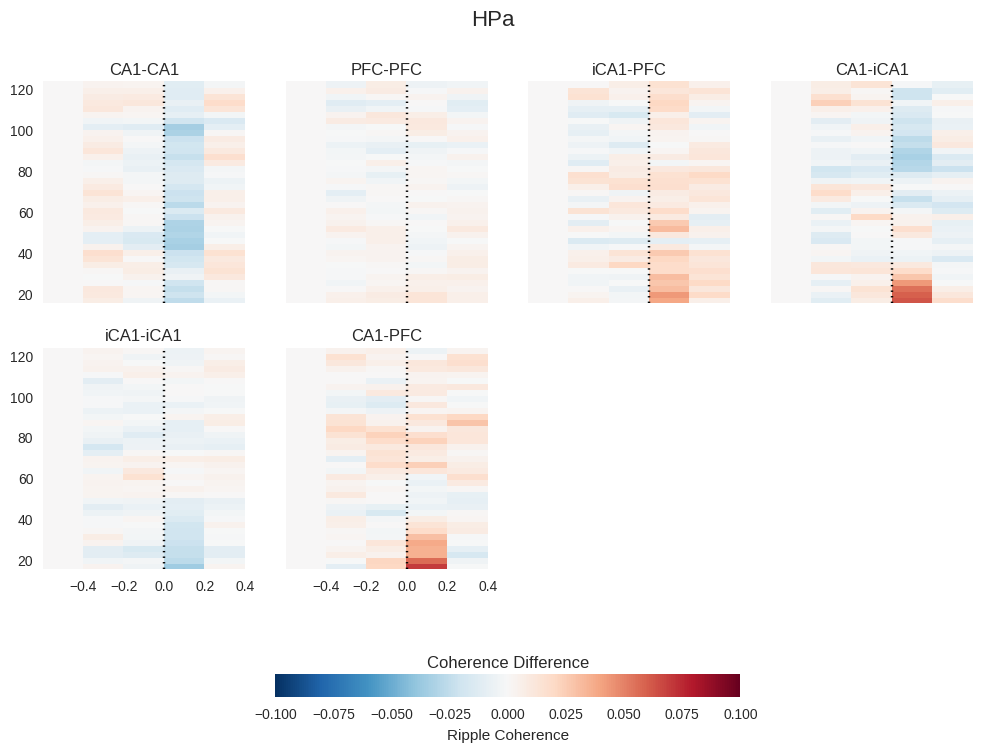

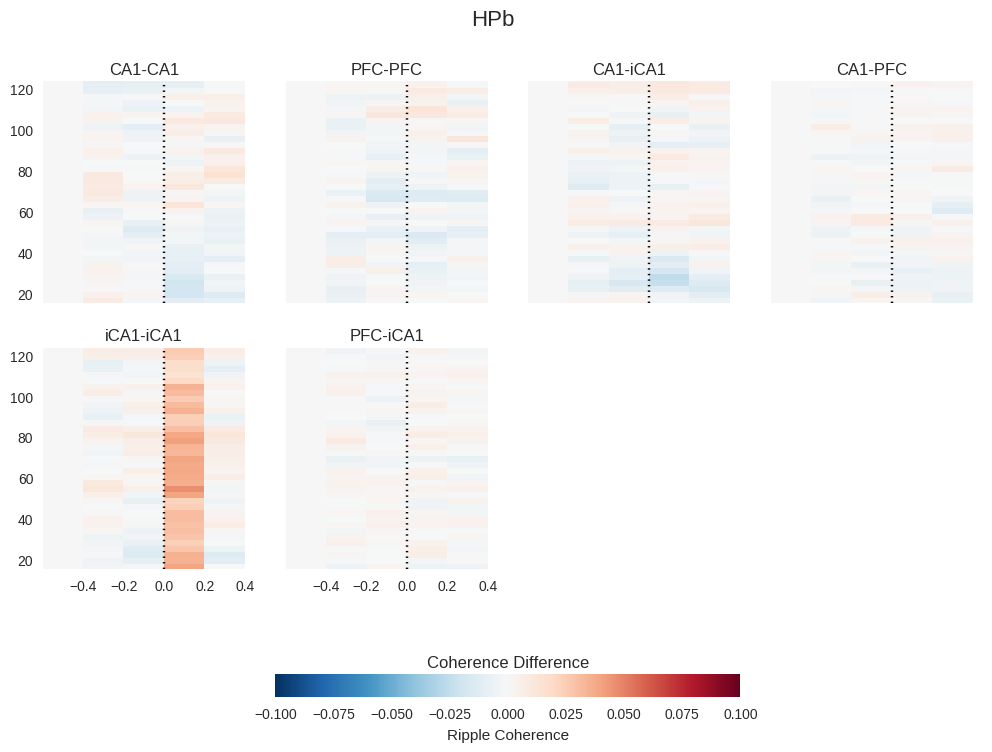

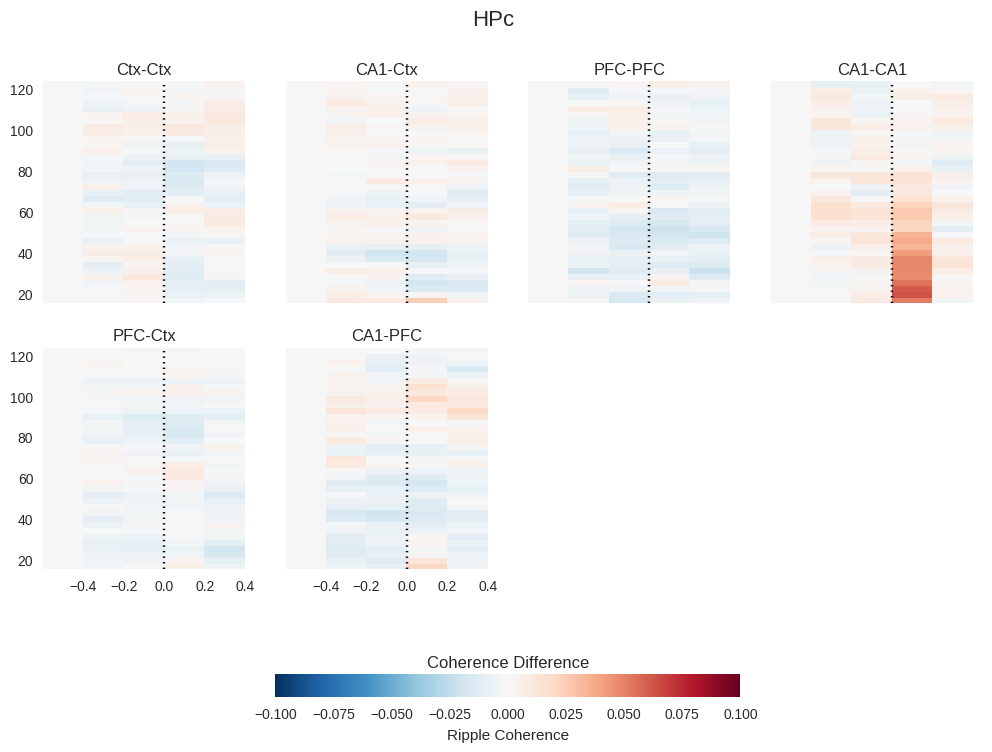

In [10]:
path = ('gamma_frequency_coherence_medFreqRes2', 'all_ripples', 'ripple_difference_from_baseline')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
tetrode_pairs_by_animal = tetrode_pair_info.groupby('animal')

for animal_name, animal_tetrode_pairs in tetrode_pairs_by_animal:
    brain_area_pair_groups = merge_symmetric_key_pairs(
        animal_tetrode_pairs.groupby(['area_1', 'area_2']).groups)
    plot_ripple_triggered_by_area(path, animal_tetrode_pairs, brain_area_pair_groups)
    plt.suptitle(animal_name, fontsize=16)

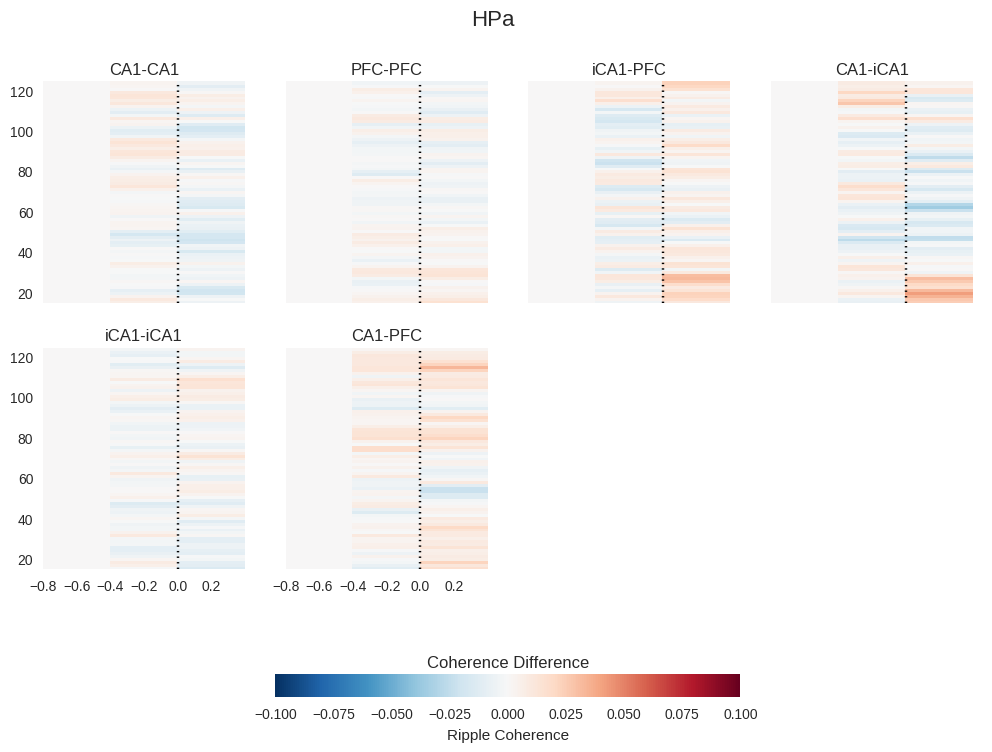

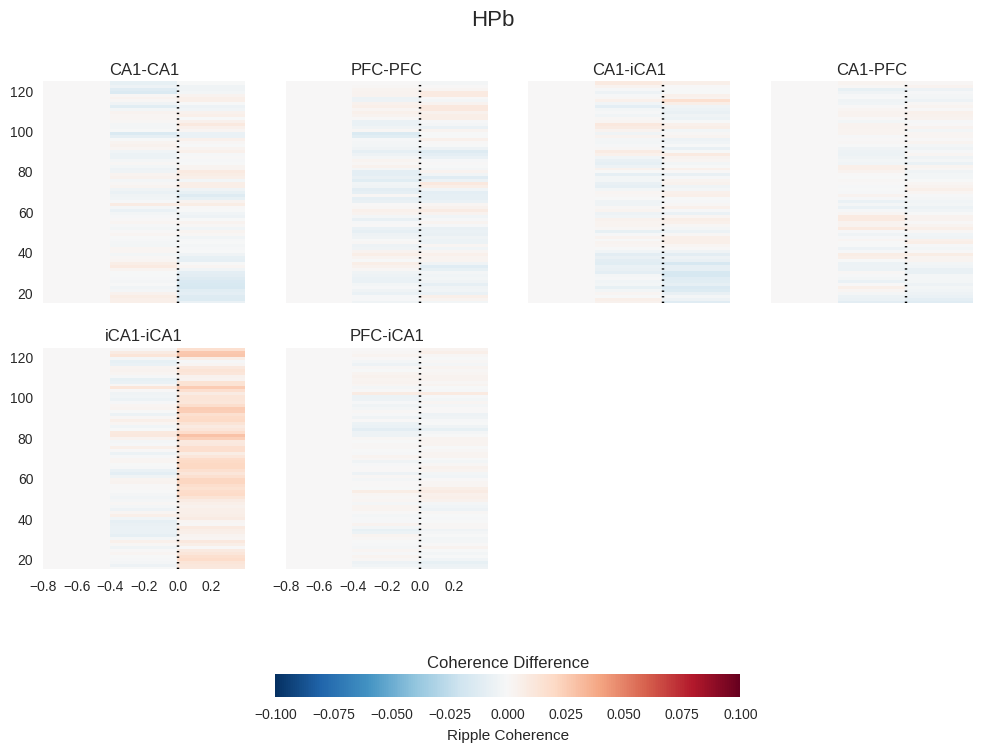

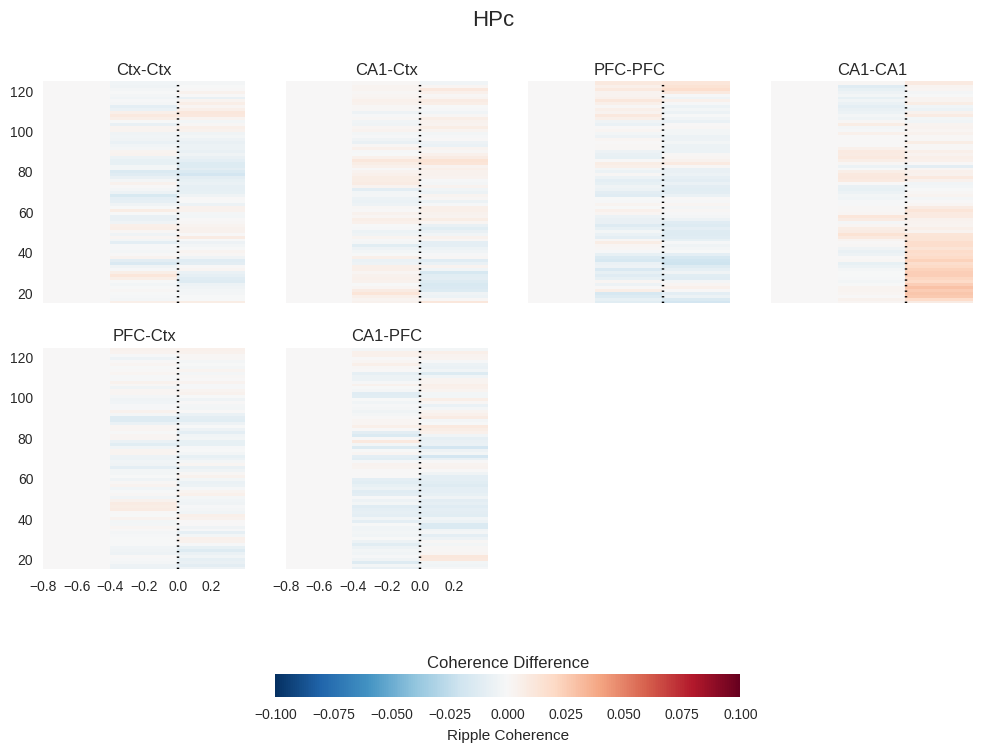

In [12]:
path = ('gamma_frequency_coherence_highFreqRes', 'all_ripples', 'ripple_difference_from_baseline')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
tetrode_pairs_by_animal = tetrode_pair_info.groupby('animal')

for animal_name, animal_tetrode_pairs in tetrode_pairs_by_animal:
    brain_area_pair_groups = merge_symmetric_key_pairs(
        animal_tetrode_pairs.groupby(['area_1', 'area_2']).groups)
    plot_ripple_triggered_by_area(path, animal_tetrode_pairs, brain_area_pair_groups)
    plt.suptitle(animal_name, fontsize=16)

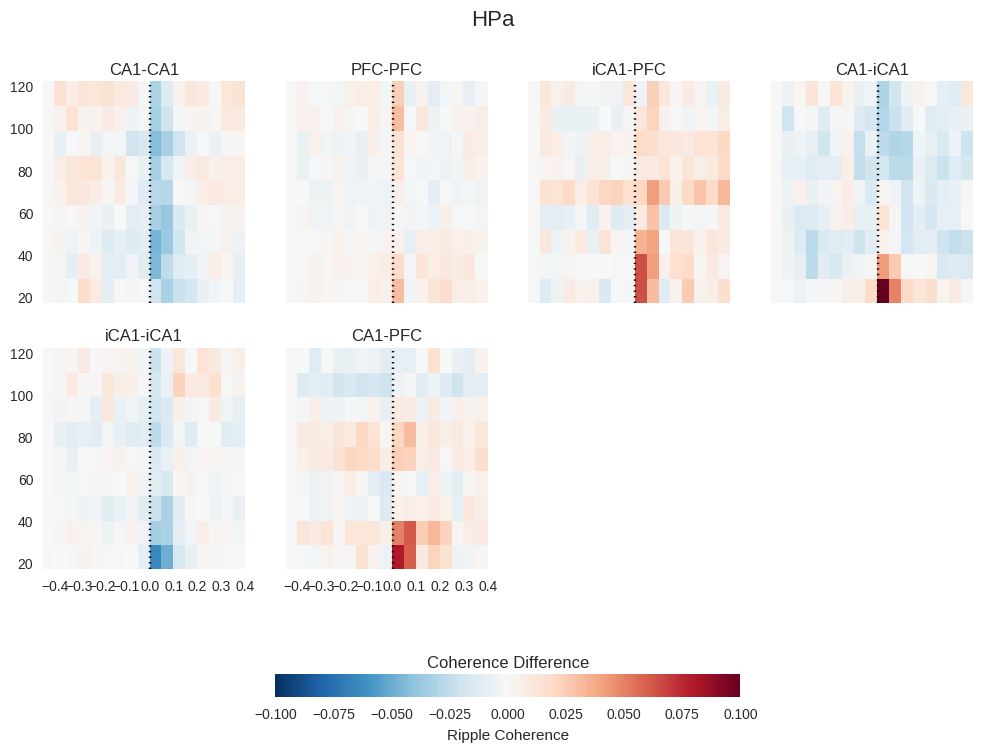

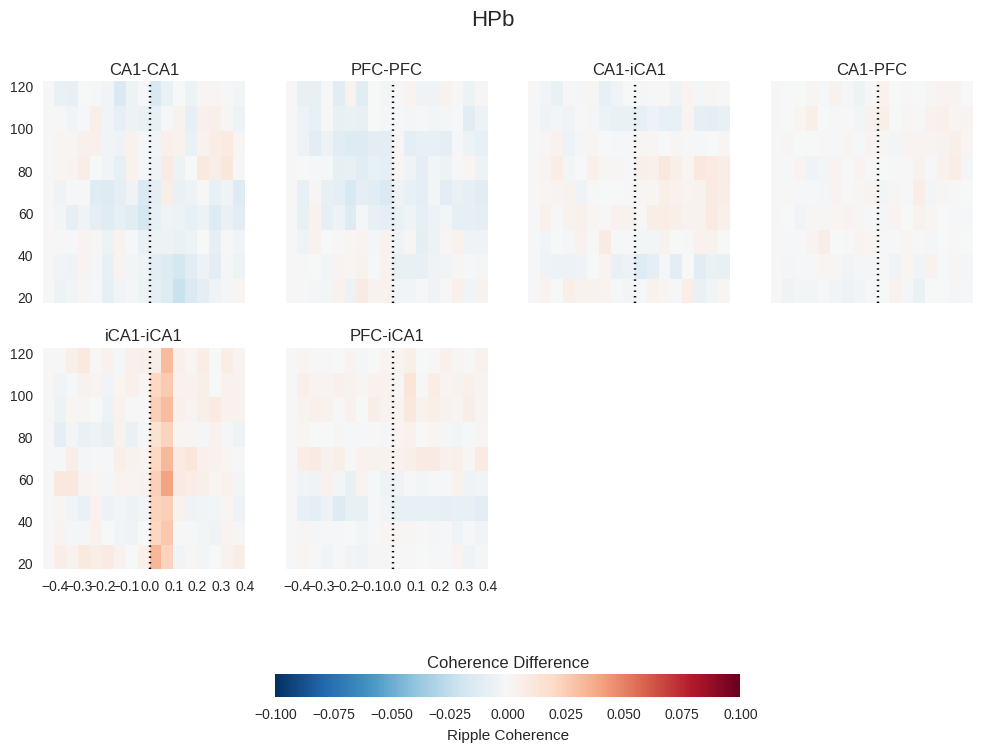

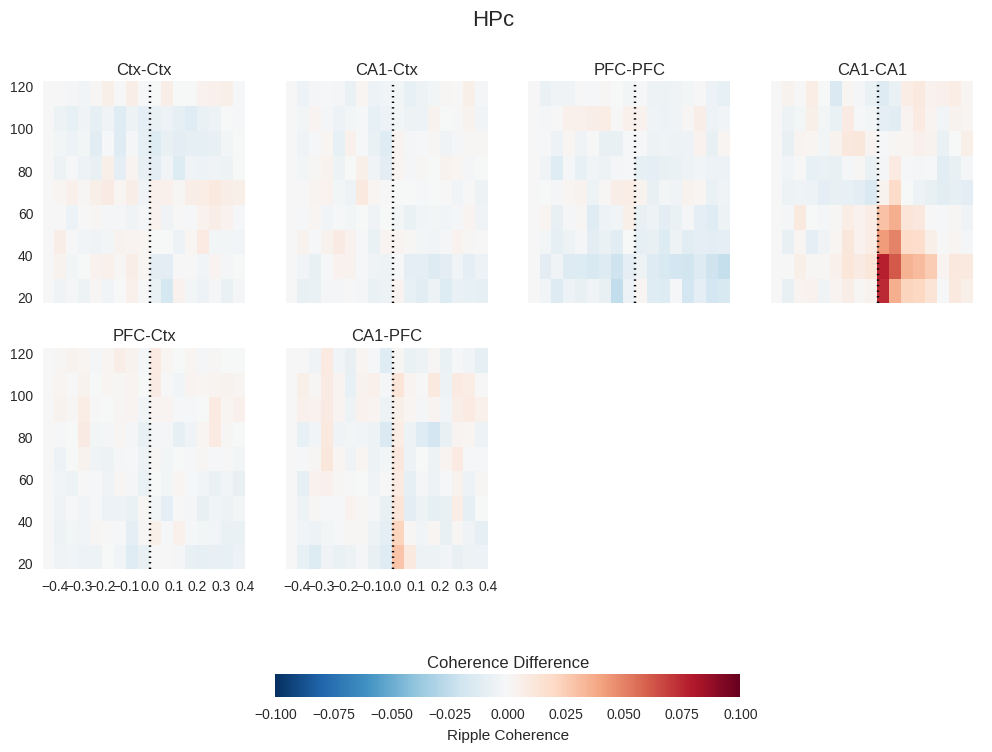

In [11]:
path = ('gamma_frequency_coherence_highTimeRes', 'all_ripples', 'ripple_difference_from_baseline')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
tetrode_pairs_by_animal = tetrode_pair_info.groupby('animal')

for animal_name, animal_tetrode_pairs in tetrode_pairs_by_animal:
    brain_area_pair_groups = merge_symmetric_key_pairs(
        animal_tetrode_pairs.groupby(['area_1', 'area_2']).groups)
    plot_ripple_triggered_by_area(path, animal_tetrode_pairs, brain_area_pair_groups)
    plt.suptitle(animal_name, fontsize=16)

## Low Frequencies

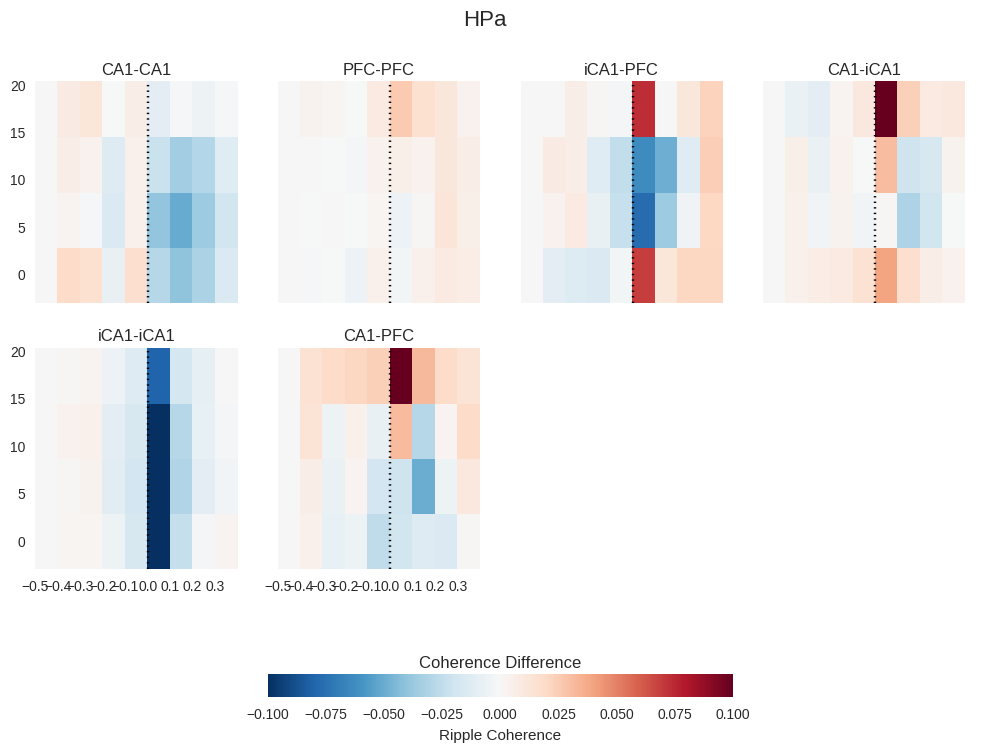

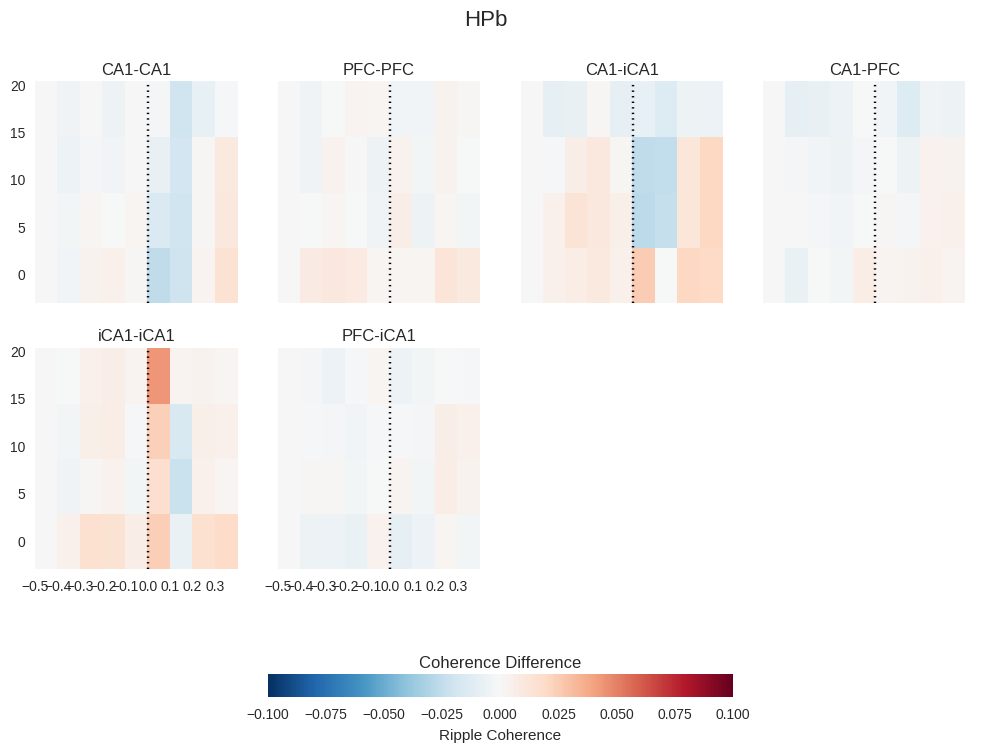

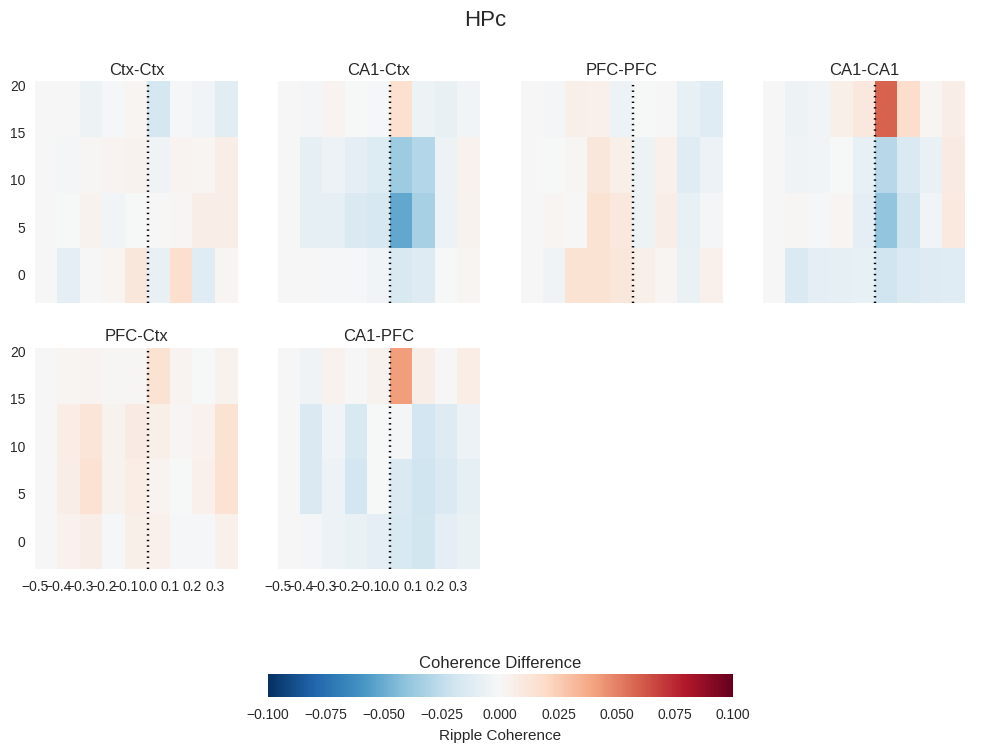

In [13]:
path = ('low_frequencies_coherence_highTimeRes', 'all_ripples', 'ripple_difference_from_baseline')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
tetrode_pairs_by_animal = tetrode_pair_info.groupby('animal')

for animal_name, animal_tetrode_pairs in tetrode_pairs_by_animal:
    brain_area_pair_groups = merge_symmetric_key_pairs(
        animal_tetrode_pairs.groupby(['area_1', 'area_2']).groups)
    plot_ripple_triggered_by_area(path, animal_tetrode_pairs, brain_area_pair_groups)
    plt.suptitle(animal_name, fontsize=16)

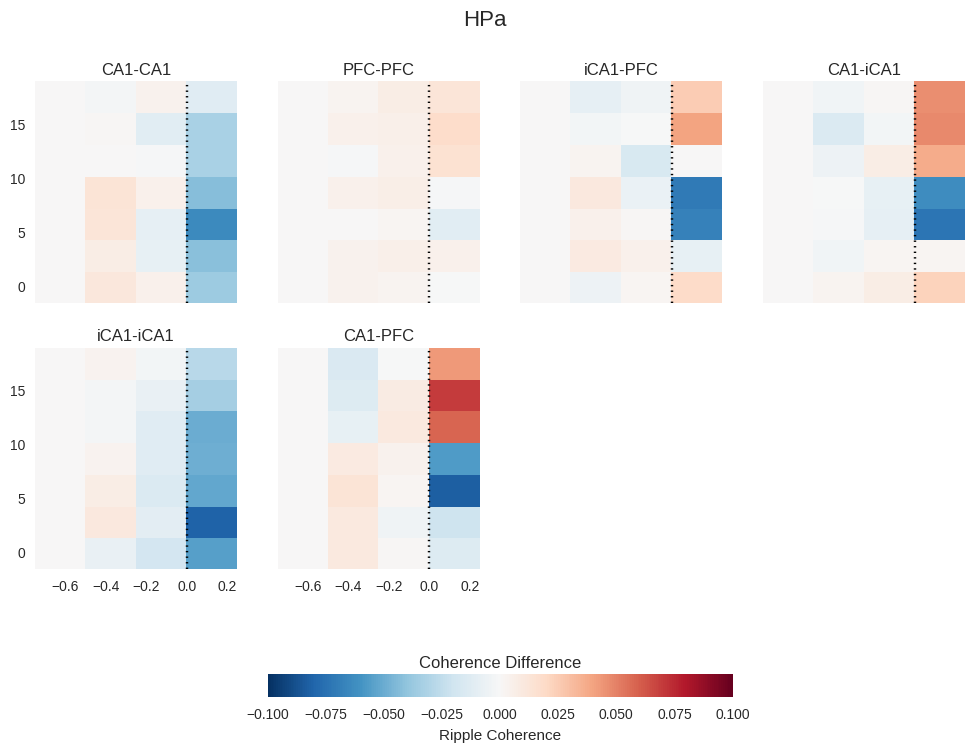

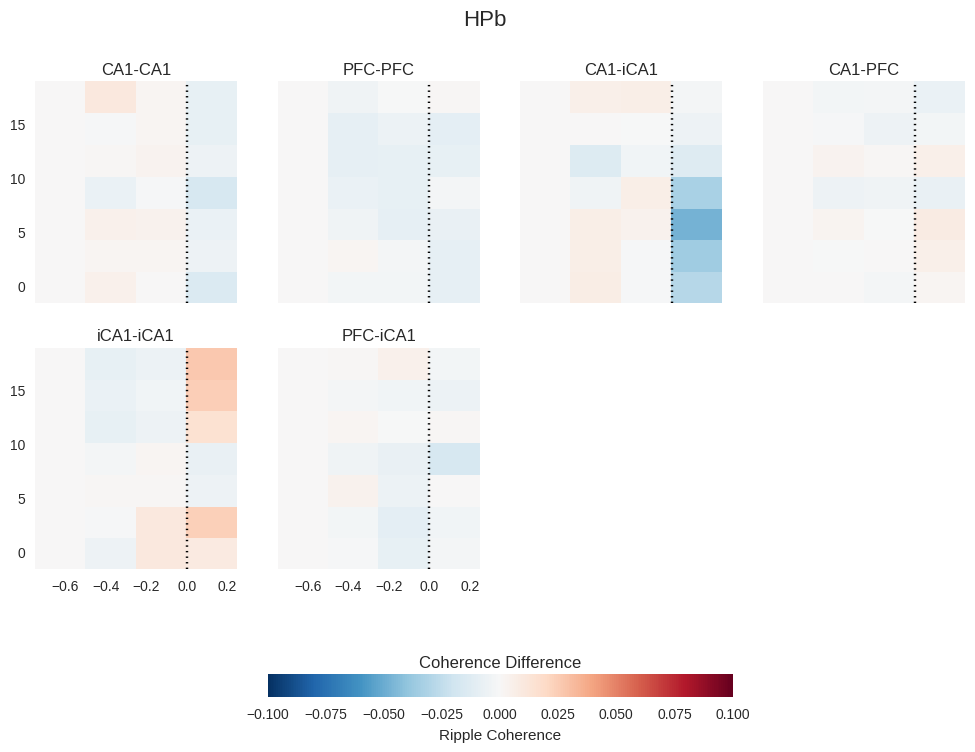

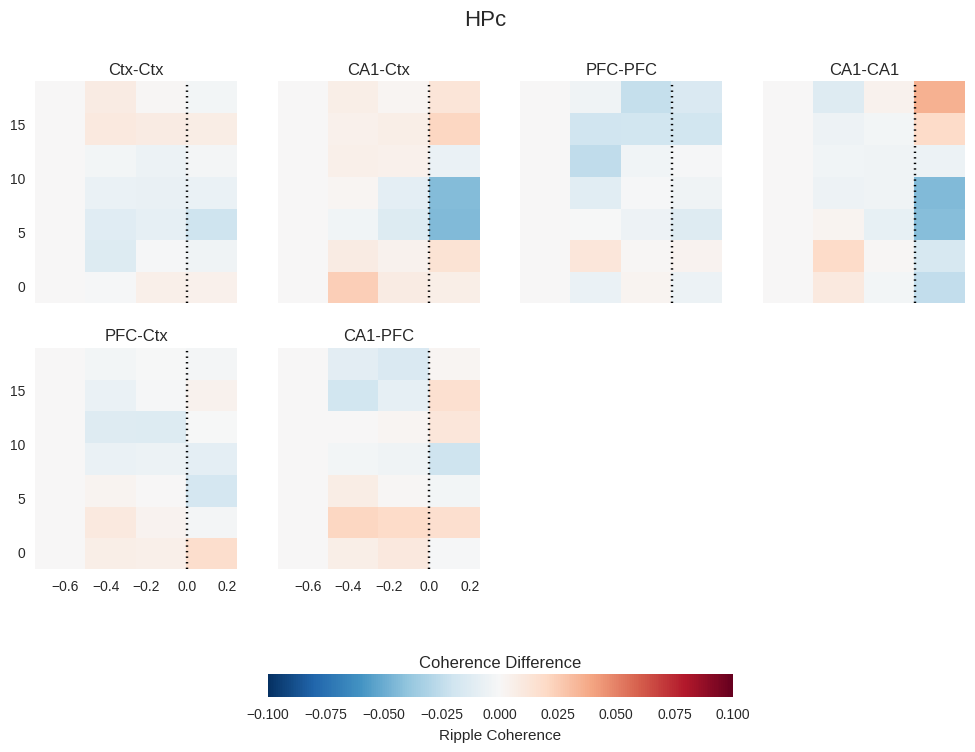

In [14]:
path = ('low_frequencies_coherence_highFreqRes', 'all_ripples', 'ripple_difference_from_baseline')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
tetrode_pairs_by_animal = tetrode_pair_info.groupby('animal')

for animal_name, animal_tetrode_pairs in tetrode_pairs_by_animal:
    brain_area_pair_groups = merge_symmetric_key_pairs(
        animal_tetrode_pairs.groupby(['area_1', 'area_2']).groups)
    plot_ripple_triggered_by_area(path, animal_tetrode_pairs, brain_area_pair_groups)
    plt.suptitle(animal_name, fontsize=16)

## Ripple Frequencies

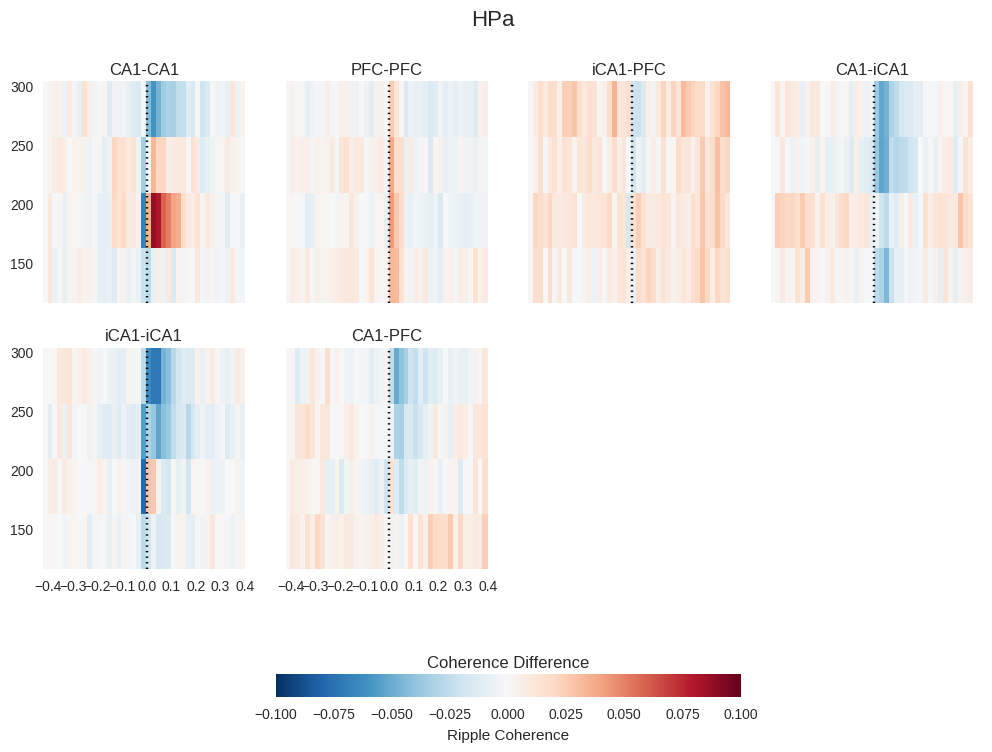

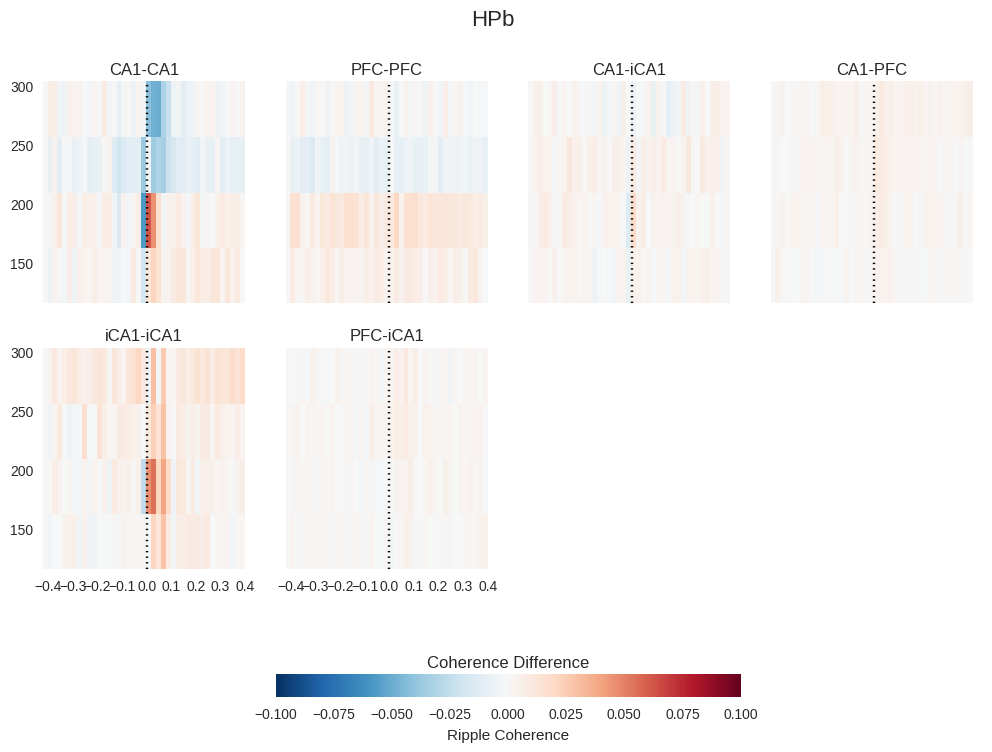

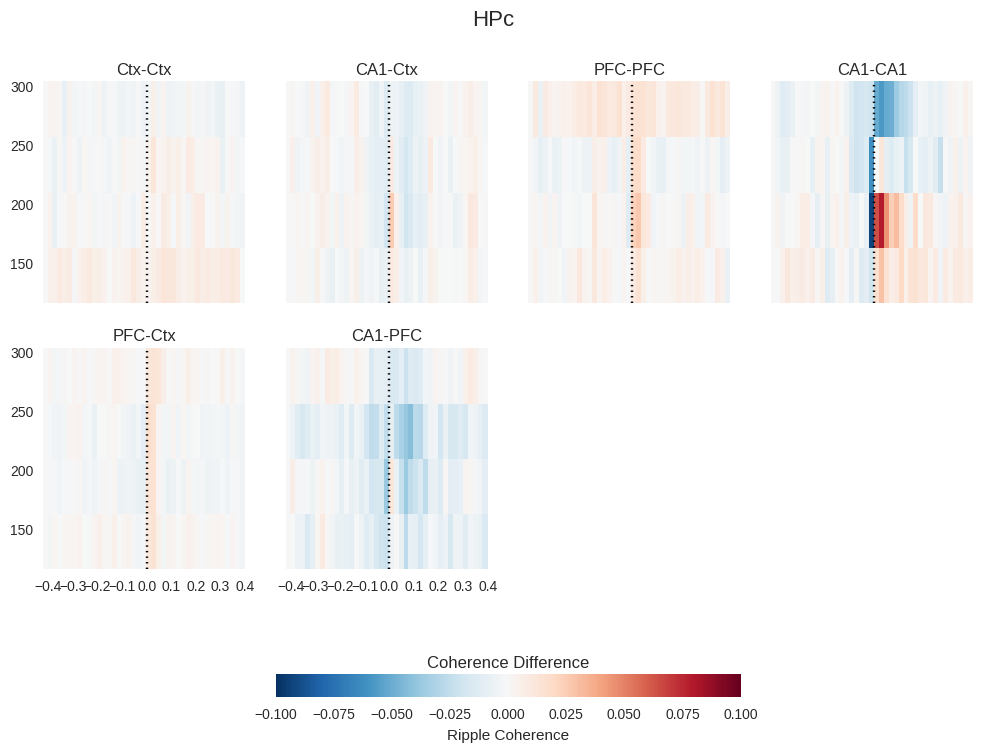

In [15]:
path = ('ripple_frequencies_coherence', 'all_ripples', 'ripple_difference_from_baseline')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
tetrode_pairs_by_animal = tetrode_pair_info.groupby('animal')

for animal_name, animal_tetrode_pairs in tetrode_pairs_by_animal:
    brain_area_pair_groups = merge_symmetric_key_pairs(
        animal_tetrode_pairs.groupby(['area_1', 'area_2']).groups)
    plot_ripple_triggered_by_area(path, animal_tetrode_pairs, brain_area_pair_groups)
    plt.suptitle(animal_name, fontsize=16)

## Difference between Ripple Types

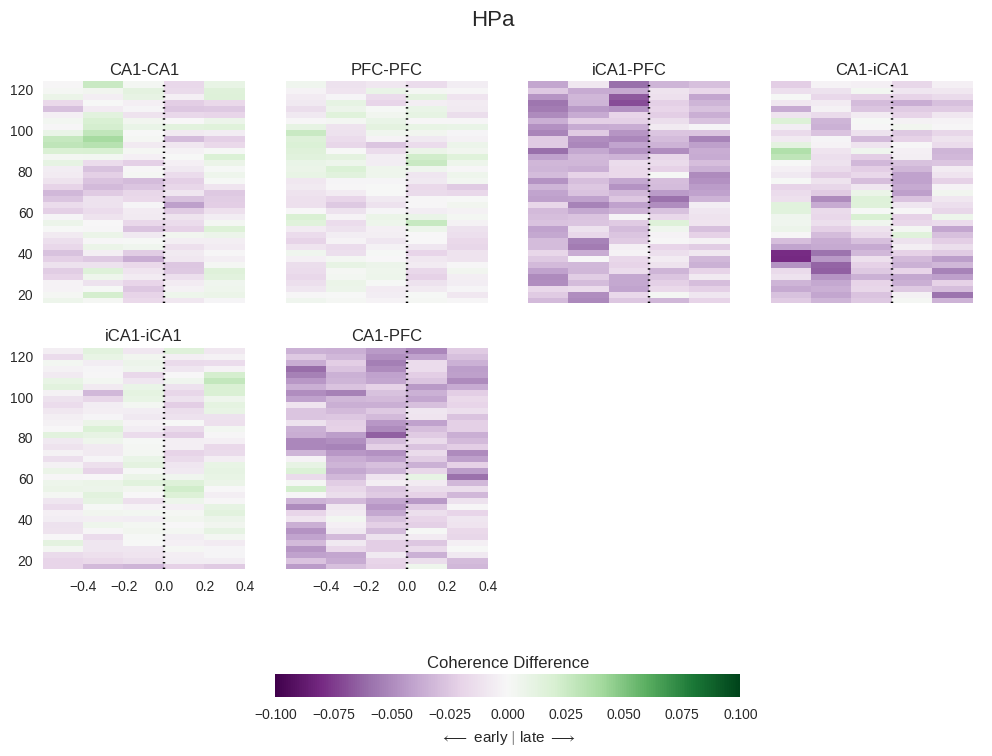

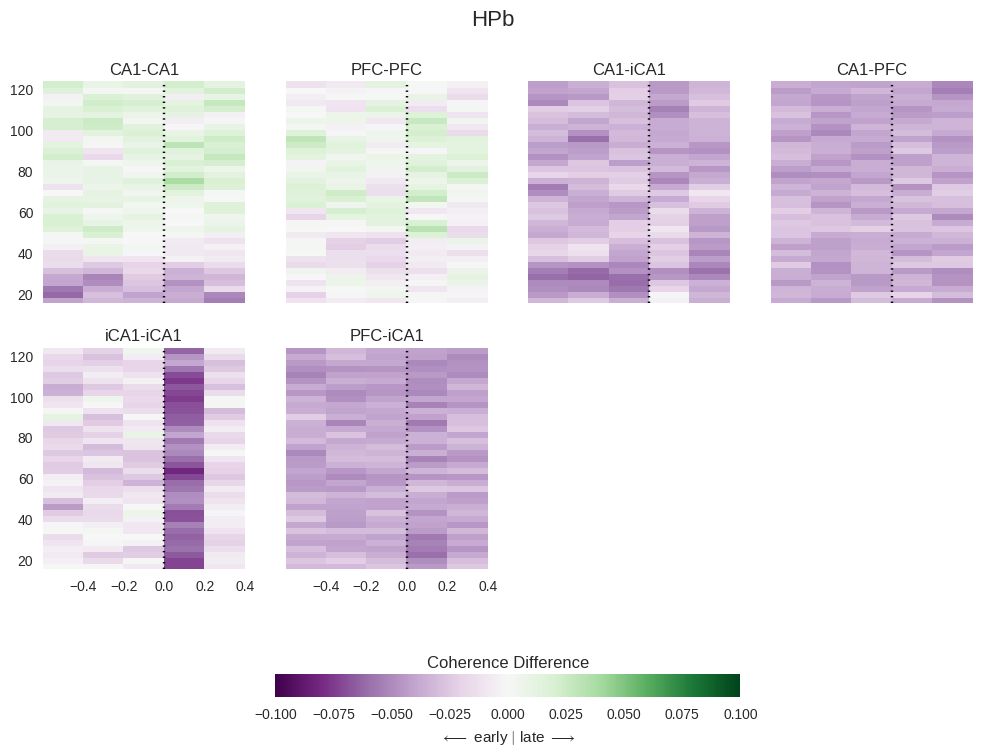

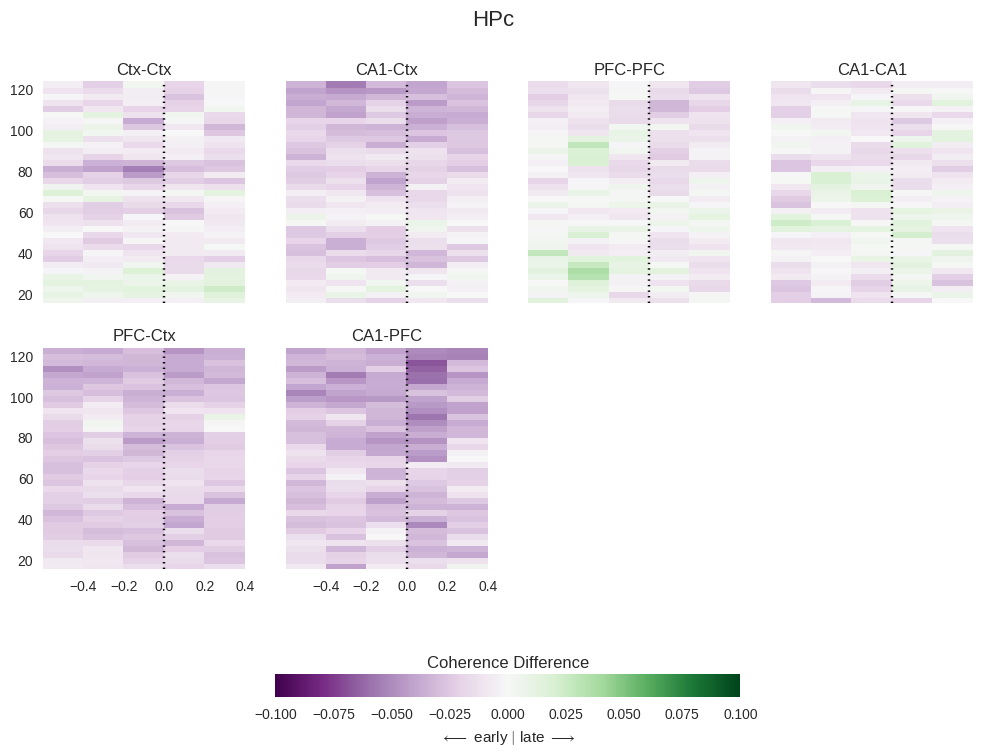

In [16]:
path = ('gamma_frequency_coherence_medFreqRes2', 'session_time', 'late_early')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
tetrode_pairs_by_animal = tetrode_pair_info.groupby('animal')

for animal_name, animal_tetrode_pairs in tetrode_pairs_by_animal:
    brain_area_pair_groups = merge_symmetric_key_pairs(
        animal_tetrode_pairs.groupby(['area_1', 'area_2']).groups)
    plot_coherence_difference_by_area(path, animal_tetrode_pairs, brain_area_pair_groups)
    plt.suptitle(animal_name, fontsize=16)

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 1 - tetrode 8

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 1 - tetrode 9

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 1 - tetrode 10

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 1 - tetrode 11

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 1 - tetrode 12

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 1 - tetrode 13

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 1 - tetrode 14

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 2 - tetrode 8

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 2 - tetrode 9

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 2 - tetrode 10

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 2 - tetrode 11

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 2 - tetrode 12

Could not load tetro

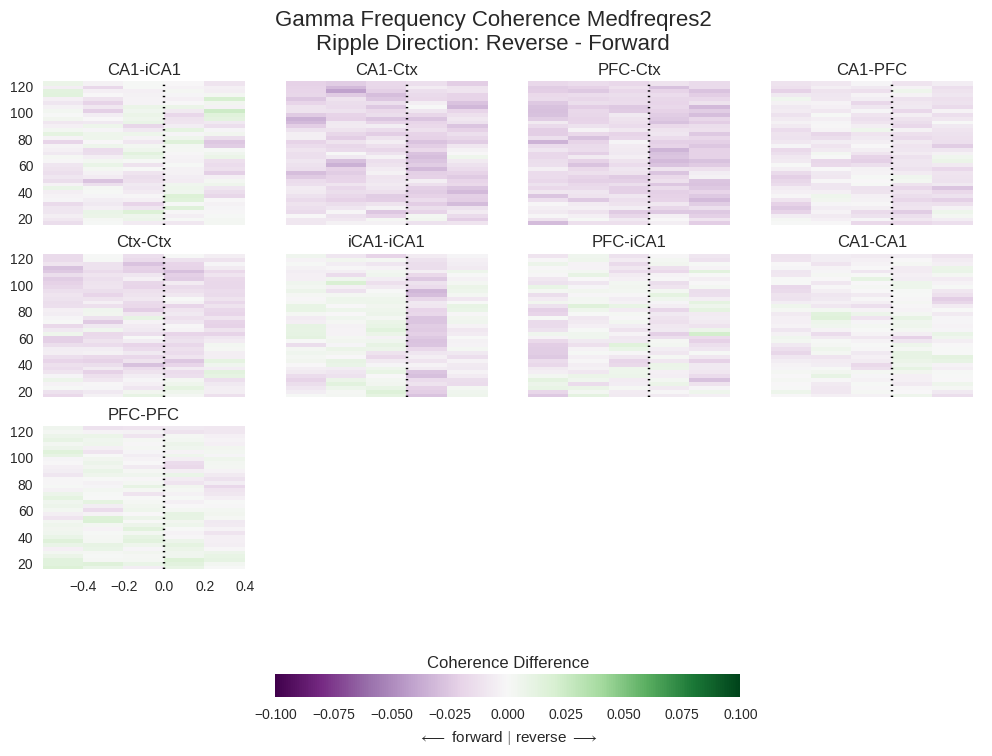

In [22]:
path = ('gamma_frequency_coherence_medFreqRes2', 'ripple_direction', 'reverse_forward')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
tetrode_pairs_by_animal = tetrode_pair_info.groupby('animal')

for animal_name, animal_tetrode_pairs in tetrode_pairs_by_animal:
    brain_area_pair_groups = merge_symmetric_key_pairs(
        animal_tetrode_pairs.groupby(['area_1', 'area_2']).groups)
    plot_coherence_difference_by_area(path, animal_tetrode_pairs, brain_area_pair_groups)
    plt.suptitle(animal_name, fontsize=16)

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 1 - tetrode 8

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 1 - tetrode 9

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 1 - tetrode 10

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 1 - tetrode 11

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 1 - tetrode 12

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 1 - tetrode 13

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 1 - tetrode 14

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 2 - tetrode 8

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 2 - tetrode 9

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 2 - tetrode 10

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 2 - tetrode 11

Could not load tetrode pair:
	animal=HPa, day=3, epoch=2
	tetrode 2 - tetrode 12

Could not load tetro

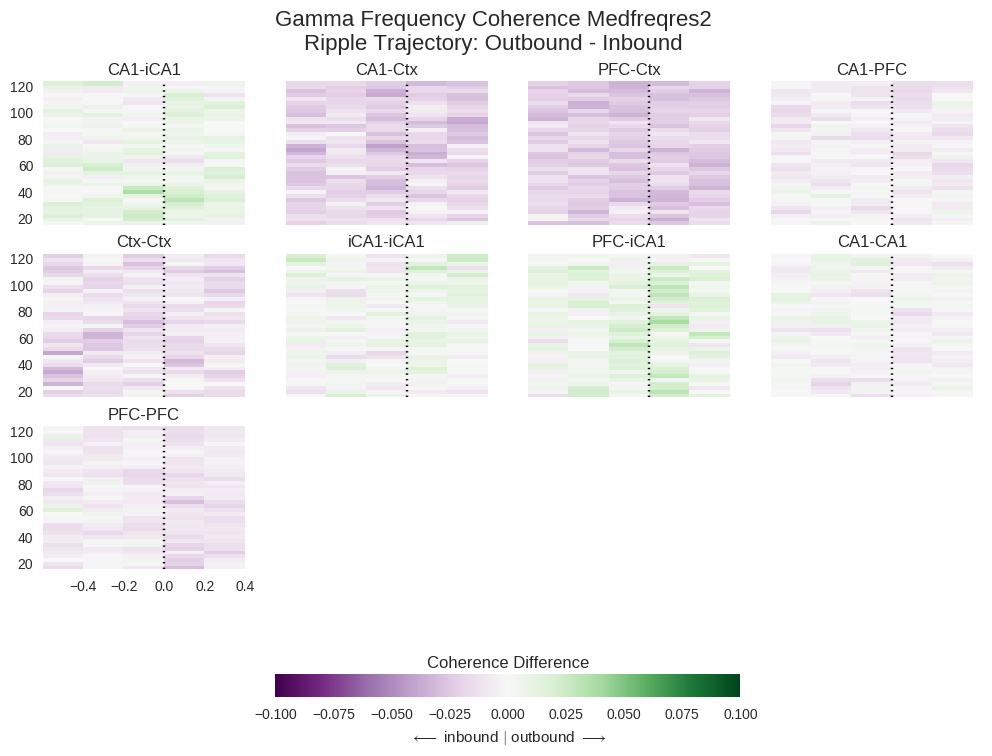

In [23]:
path = ('gamma_frequency_coherence_medFreqRes2', 'ripple_trajectory', 'outbound_inbound')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
tetrode_pairs_by_animal = tetrode_pair_info.groupby('animal')

for animal_name, animal_tetrode_pairs in tetrode_pairs_by_animal:
    brain_area_pair_groups = merge_symmetric_key_pairs(
        animal_tetrode_pairs.groupby(['area_1', 'area_2']).groups)
    plot_coherence_difference_by_area(path, animal_tetrode_pairs, brain_area_pair_groups)
    plt.suptitle(animal_name, fontsize=16)

## Canonical Coherence

In [3]:
def get_area_pair(*args):
    try:
        return get_area_pair_from_hdf(*args)
    except KeyError:
        pass

def get_area_pair_group_from_hdf5(coherence_name, covariate, level, area1, area2, epoch_index):
    return pd.Panel({epoch: get_area_pair(coherence_name, covariate, level, area1, area2, epoch)
            for epoch in epoch_index})

def plot_ripple_triggered_canonical_by_area(path, tetrode_info, epoch_index,
                                            col_wrap=4, figsize=(12, 9)):
    brain_area_group_pairs = list(combinations(sorted(tetrode_info.area.unique()), 2))
    coherence_name, covariate, level = path
    num_groups = len(brain_area_group_pairs)
    num_rows = int(np.ceil(num_groups / col_wrap))

    fig, axes = plt.subplots(num_rows, col_wrap, figsize=figsize, sharex=True, sharey=True)
    axes = axes.flatten()
    for group_ind, (area1, area2) in enumerate(brain_area_group_pairs):
        try:
            group_coherence = get_area_pair_group_from_hdf5(coherence_name, covariate, level, area1, area2, epoch_index)
            mesh = plot_coherogram(group_coherence.mean(axis=0), axis_handle=axes[group_ind],
                                            vmin=-0.1, vmax=0.1, cmap='RdBu_r')
            axes[group_ind].set_title('-'.join((area1, area2)))
            axes[group_ind].axvline(0, color='black', linestyle=':')
        except AttributeError:
            axes[group_ind].set_title('-'.join((area1, area2)))
            pass
    for ax in axes[num_groups:]:
        ax.axis('off')
    clb = plt.colorbar(mesh, ax=axes.tolist(), shrink=0.5, orientation='horizontal', label='Ripple Coherence')
    clb.ax.set_title('Coherence Difference')

    title = '{}\n{}:'.format(coherence_name.replace('_', ' ').title(),
                             covariate.replace('_', ' ').title())
    plt.suptitle(title, fontsize=16)


In [4]:
Animal = namedtuple('Animal', {'directory', 'short_name'})
num_days = 8
days = range(1, num_days + 1)
animals = {'HPa': Animal(directory='HPa_direct', short_name='HPa'),
           'HPb': Animal(directory='HPb_direct', short_name='HPb'),
           'HPc': Animal(directory='HPc_direct', short_name='HPc')
           }
epoch_info = make_epochs_dataframe(animals, days)
epoch_index = epoch_info[(epoch_info.type == 'run') & (epoch_info.environment != 'lin')].index

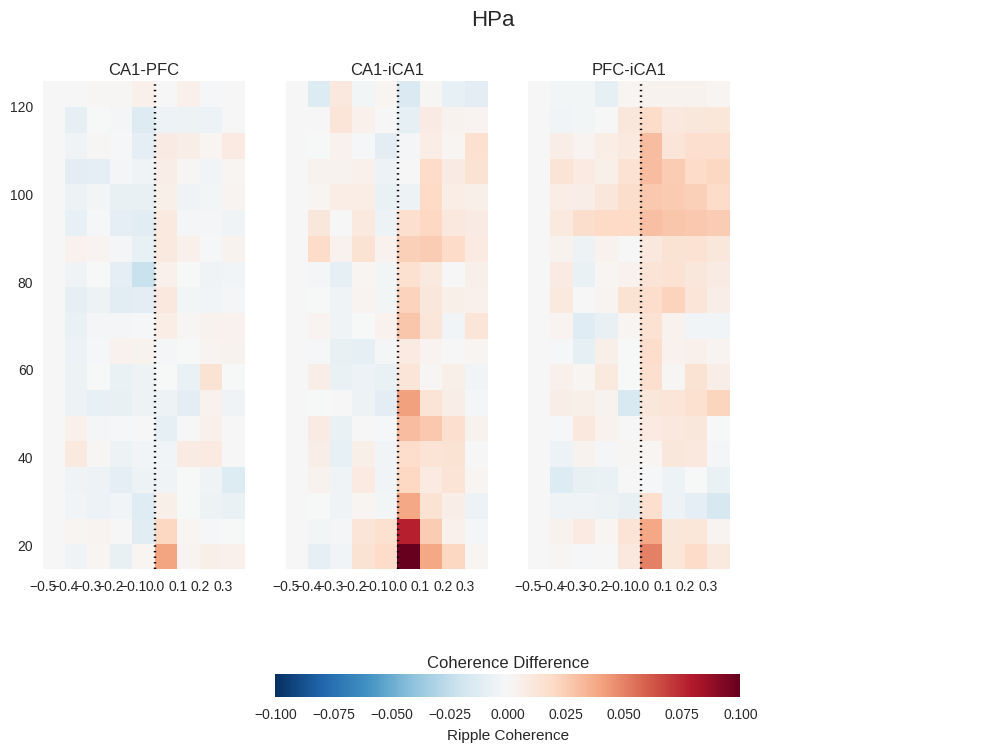

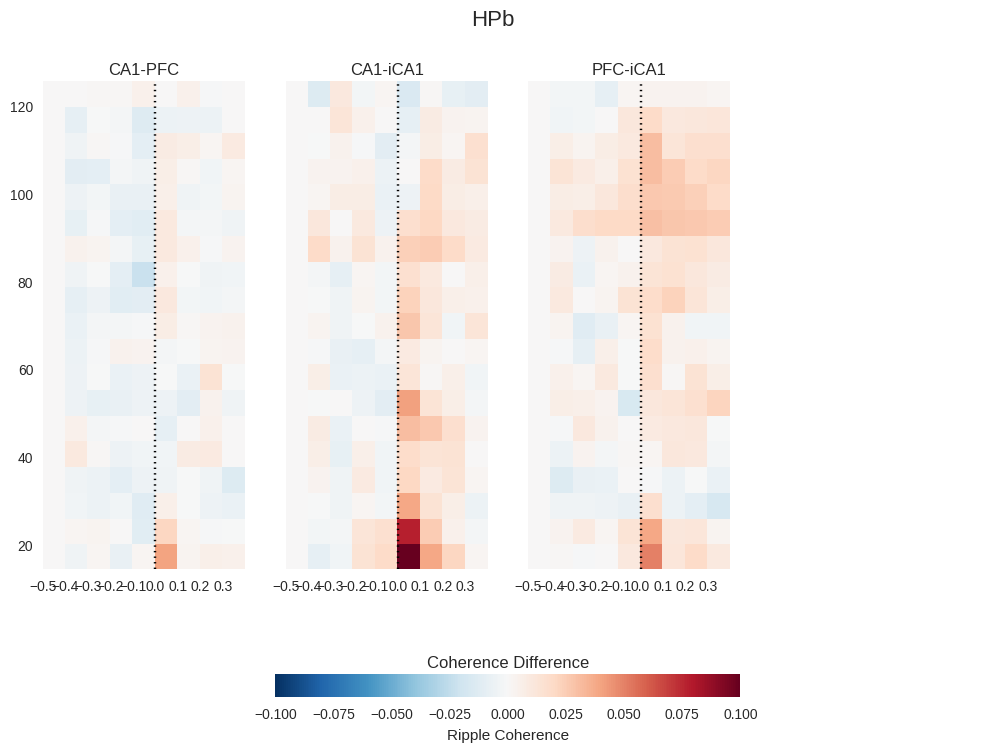

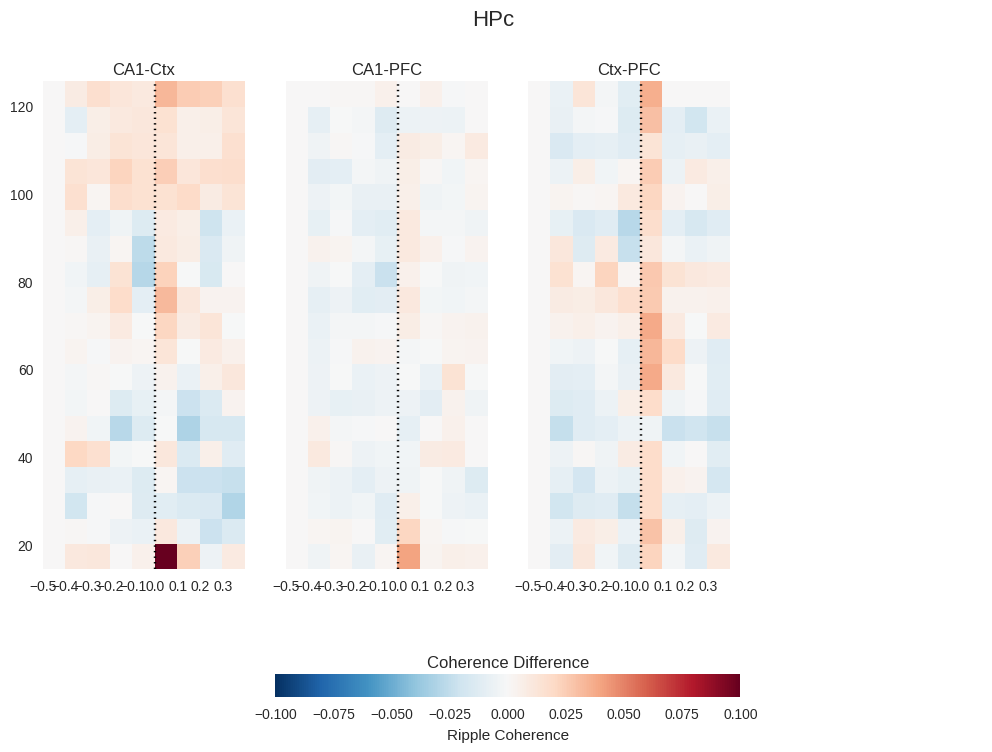

In [5]:
path = ('gamma_frequency_coherence_medFreqRes1', 'all_ripples', 'ripple_difference_from_baseline')
tetrode_info = get_all_tetrode_info(path[0])
tetrode_info_by_animal = tetrode_info.groupby('animal')

for animal_name, animal_tetrode_info in tetrode_info_by_animal:
    plot_ripple_triggered_canonical_by_area(path, animal_tetrode_info, epoch_index)
    plt.suptitle(animal_name, fontsize=16)

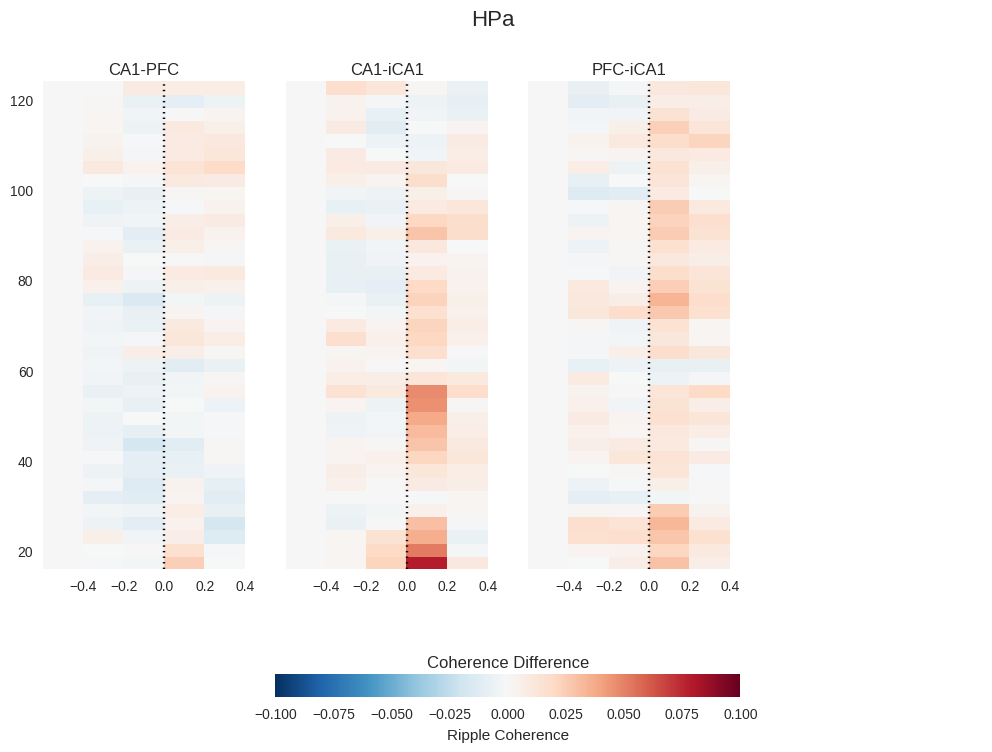

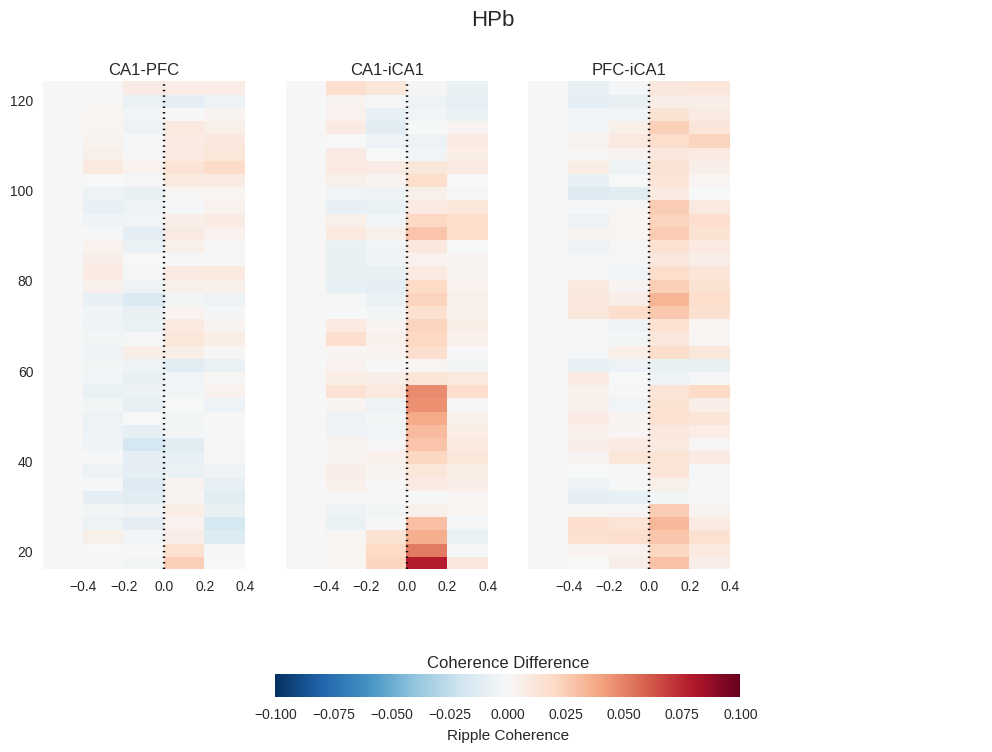

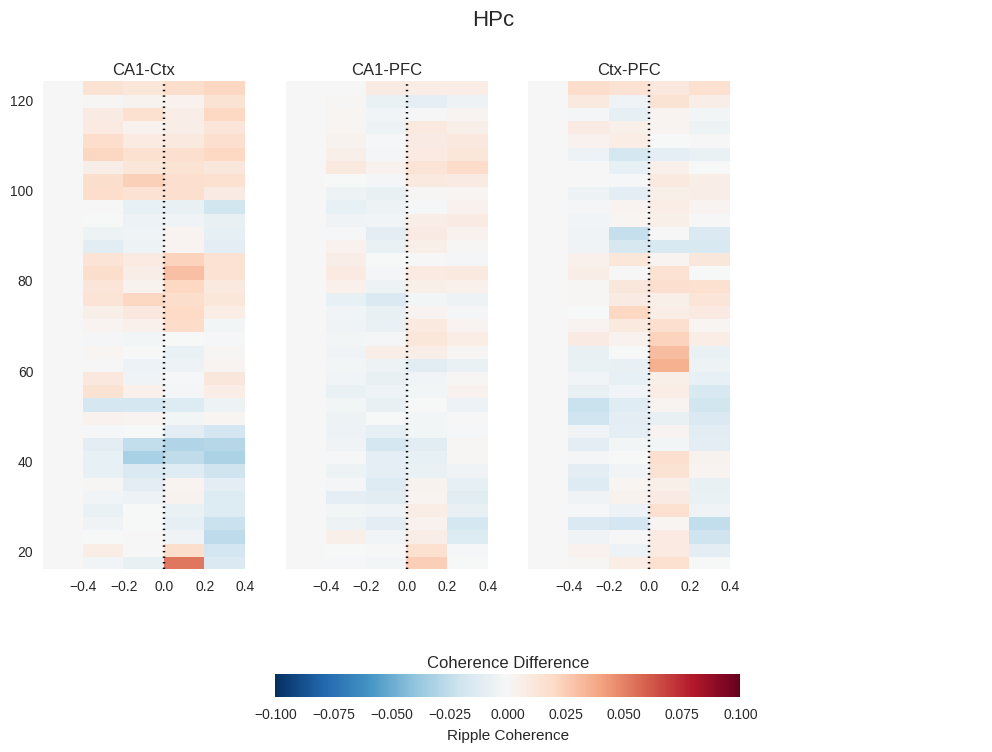

In [6]:
path = ('gamma_frequency_coherence_medFreqRes2', 'all_ripples', 'ripple_difference_from_baseline')
tetrode_info = get_all_tetrode_info(path[0])
tetrode_info_by_animal = tetrode_info.groupby('animal')

for animal_name, animal_tetrode_info in tetrode_info_by_animal:
    plot_ripple_triggered_canonical_by_area(path, animal_tetrode_info, epoch_index)
    plt.suptitle(animal_name, fontsize=16)

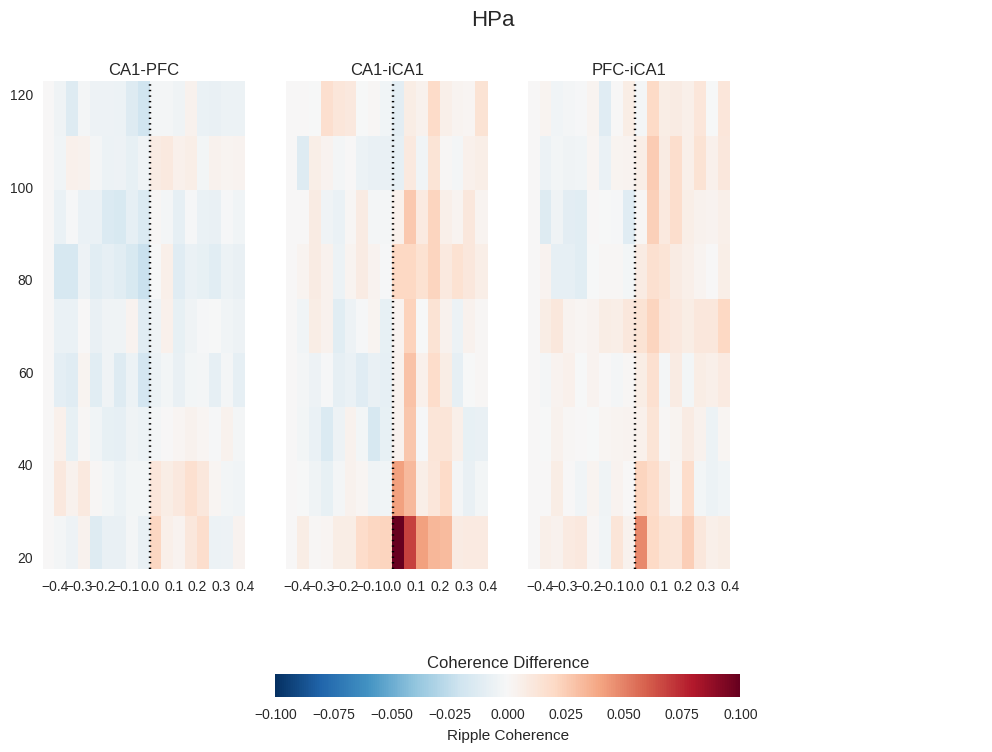

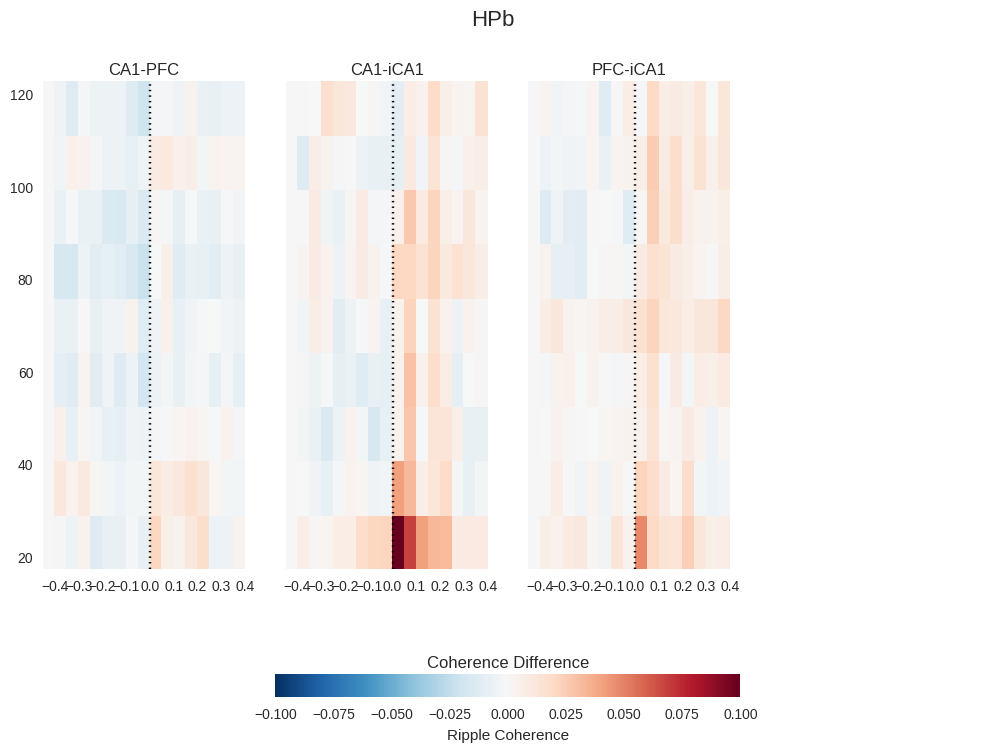

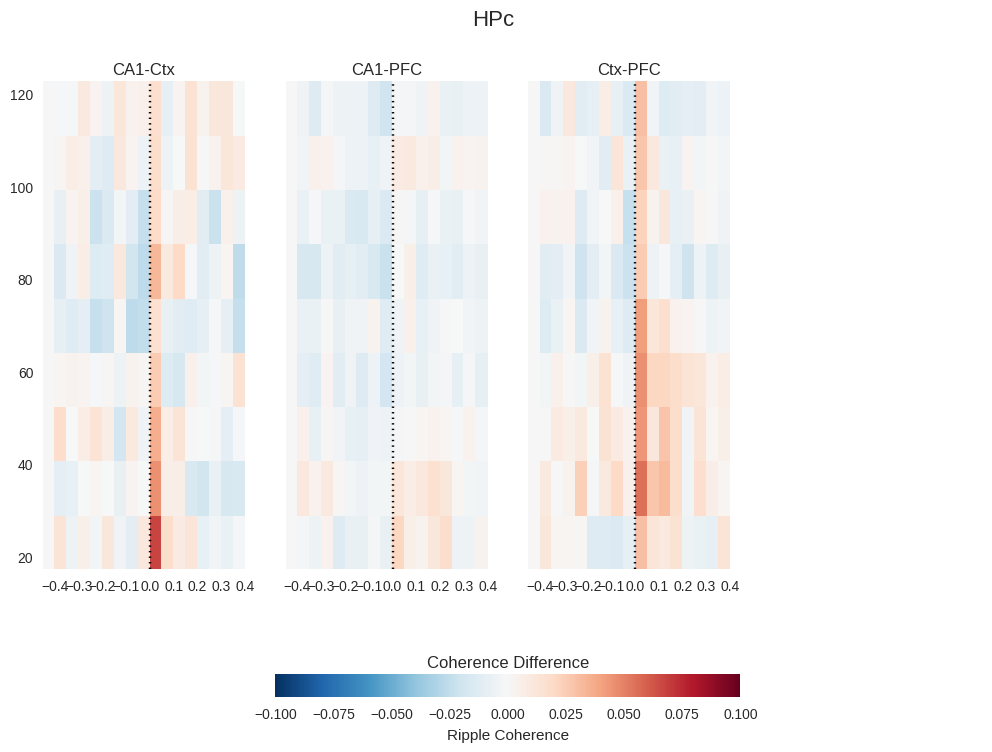

In [7]:
path = ('gamma_frequency_coherence_highTimeRes', 'all_ripples', 'ripple_difference_from_baseline')
tetrode_info = get_all_tetrode_info(path[0])
tetrode_info_by_animal = tetrode_info.groupby('animal')

for animal_name, animal_tetrode_info in tetrode_info_by_animal:
    plot_ripple_triggered_canonical_by_area(path, animal_tetrode_info, epoch_index)
    plt.suptitle(animal_name, fontsize=16)

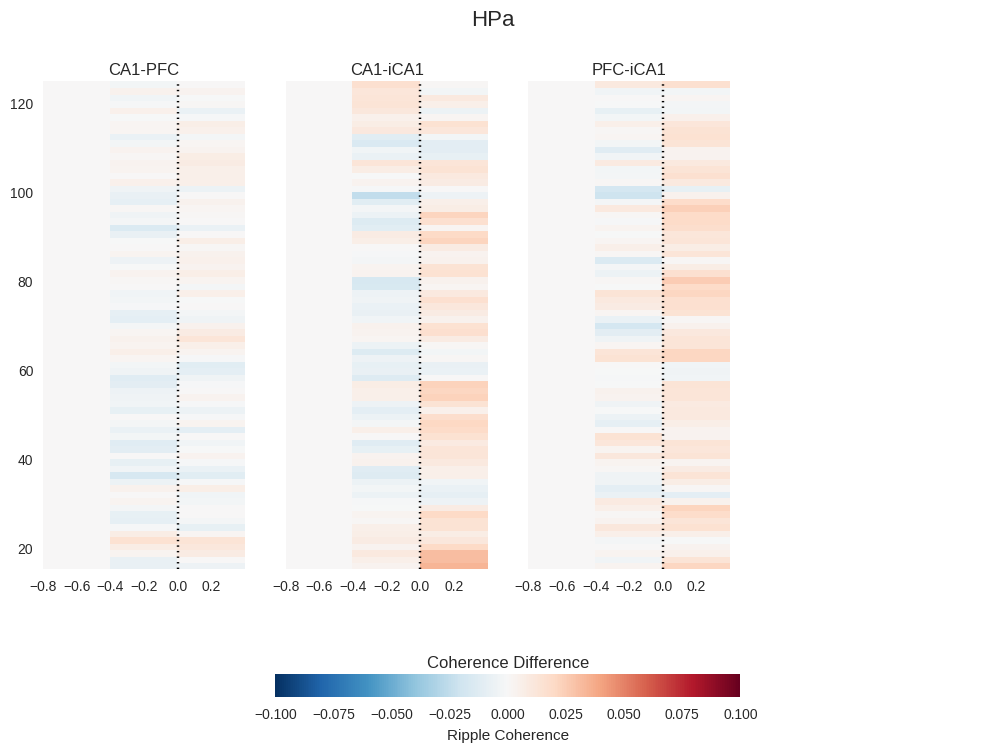

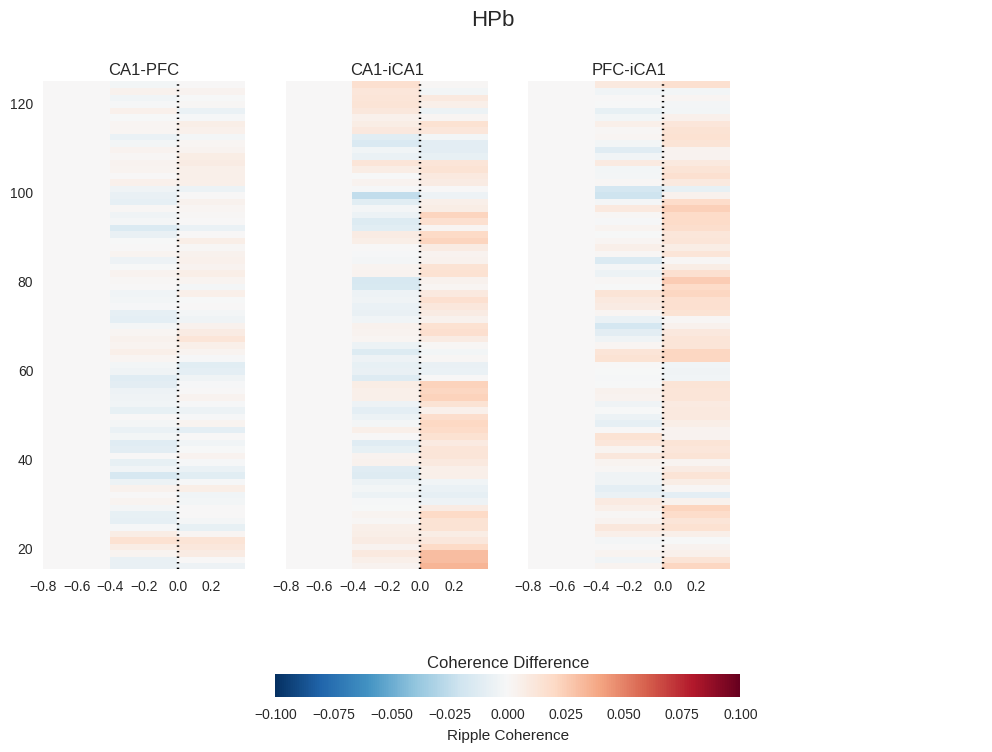

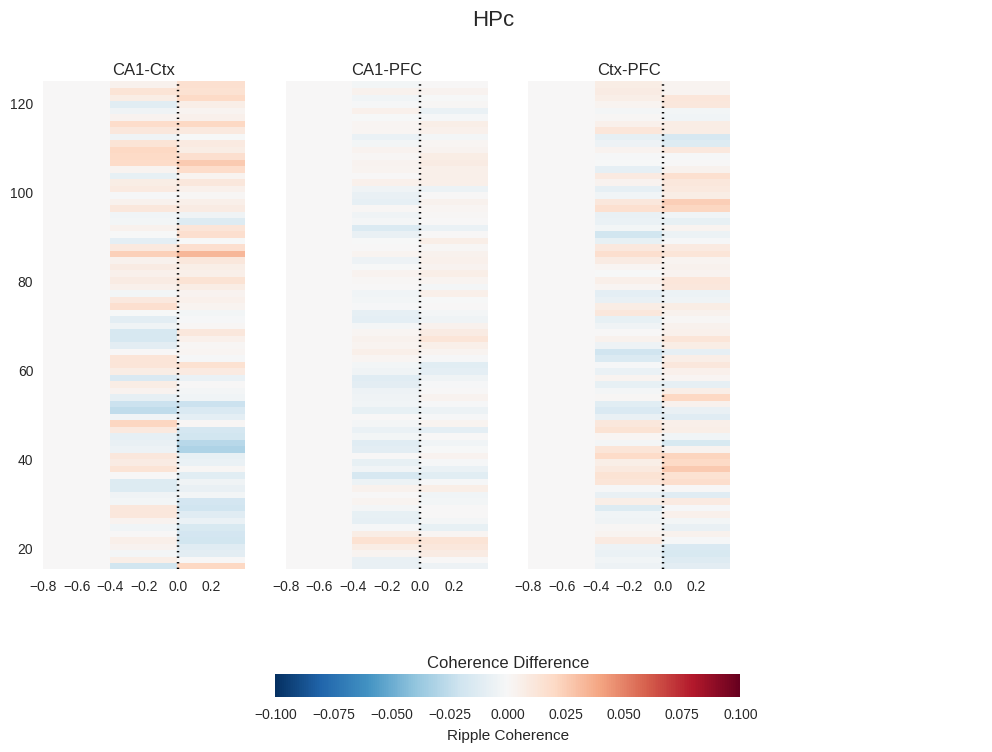

In [8]:
path = ('gamma_frequency_coherence_highFreqRes', 'all_ripples', 'ripple_difference_from_baseline')
tetrode_info = get_all_tetrode_info(path[0])
tetrode_info_by_animal = tetrode_info.groupby('animal')

for animal_name, animal_tetrode_info in tetrode_info_by_animal:
    plot_ripple_triggered_canonical_by_area(path, animal_tetrode_info, epoch_index)
    plt.suptitle(animal_name, fontsize=16)

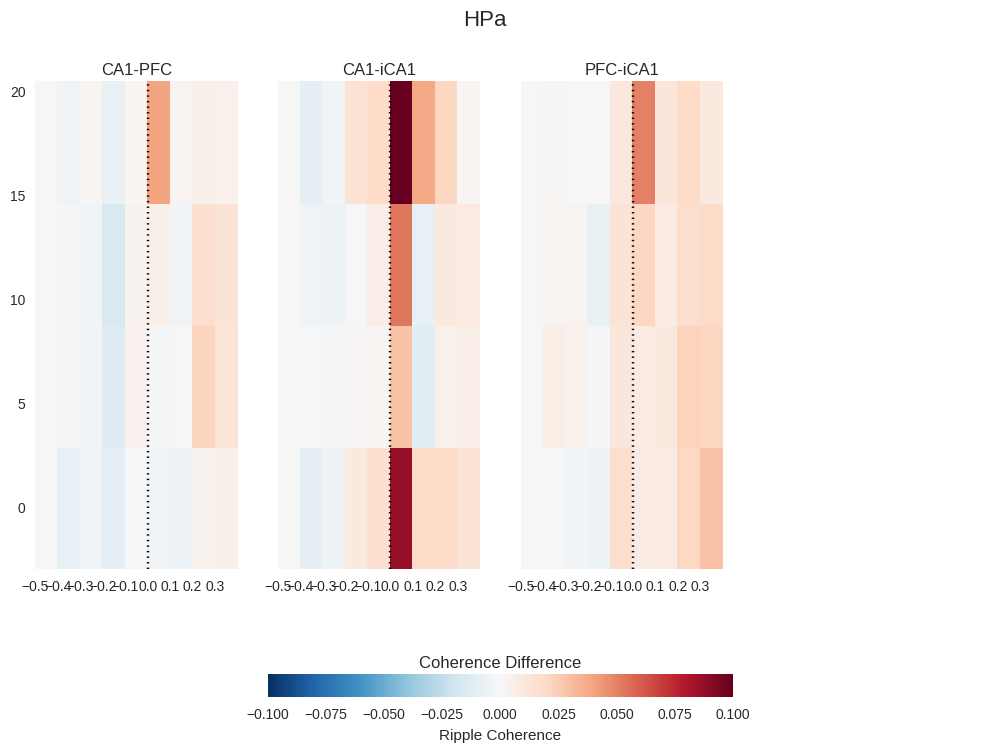

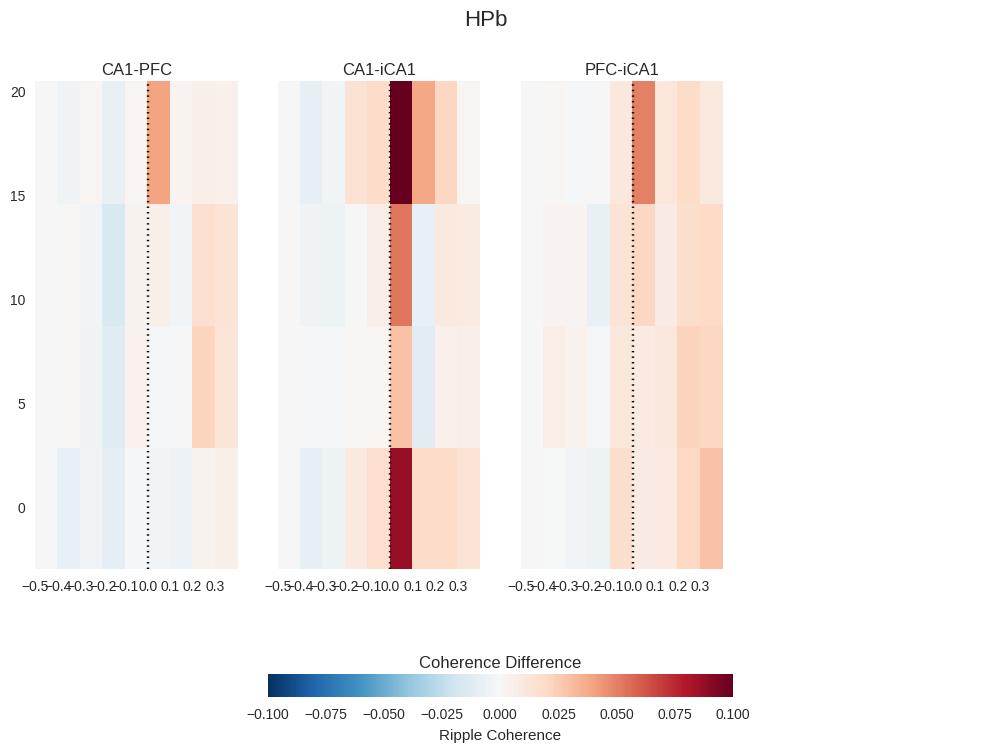

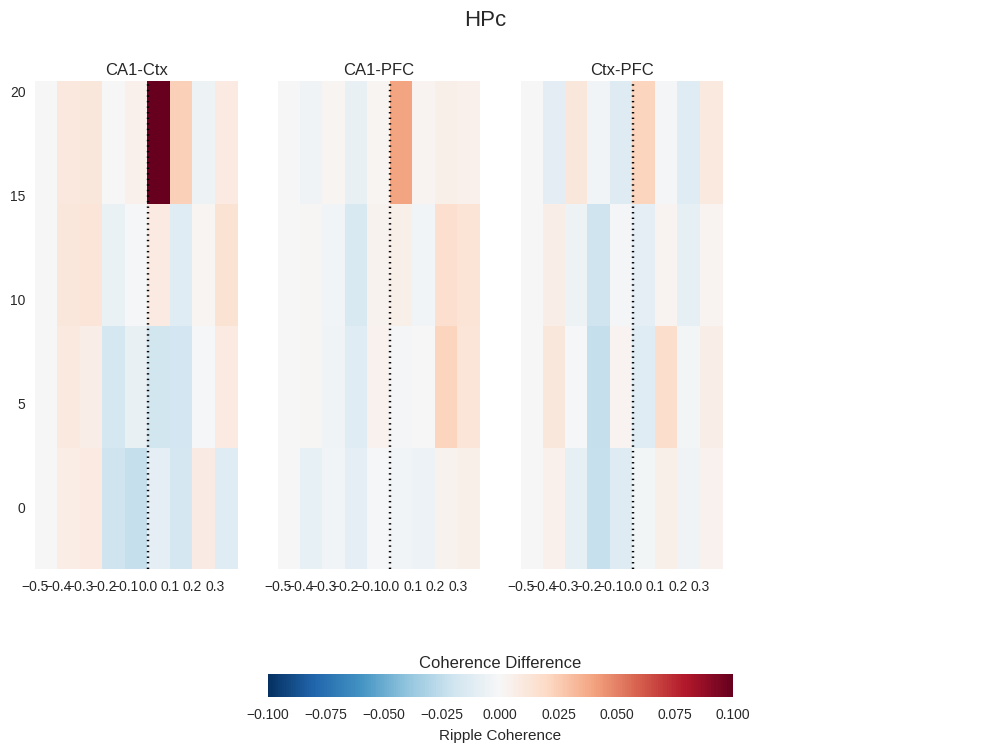

In [9]:
path = ('low_frequencies_coherence_highTimeRes', 'all_ripples', 'ripple_difference_from_baseline')
tetrode_info = get_all_tetrode_info(path[0])
tetrode_info_by_animal = tetrode_info.groupby('animal')

for animal_name, animal_tetrode_info in tetrode_info_by_animal:
    plot_ripple_triggered_canonical_by_area(path, animal_tetrode_info, epoch_index)
    plt.suptitle(animal_name, fontsize=16)

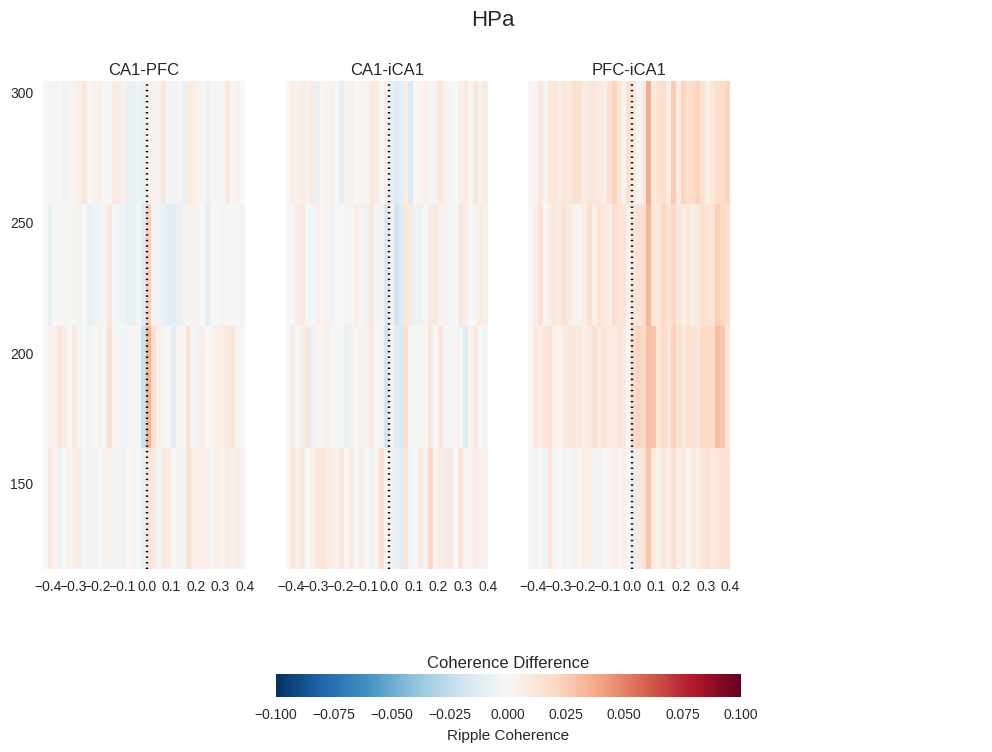

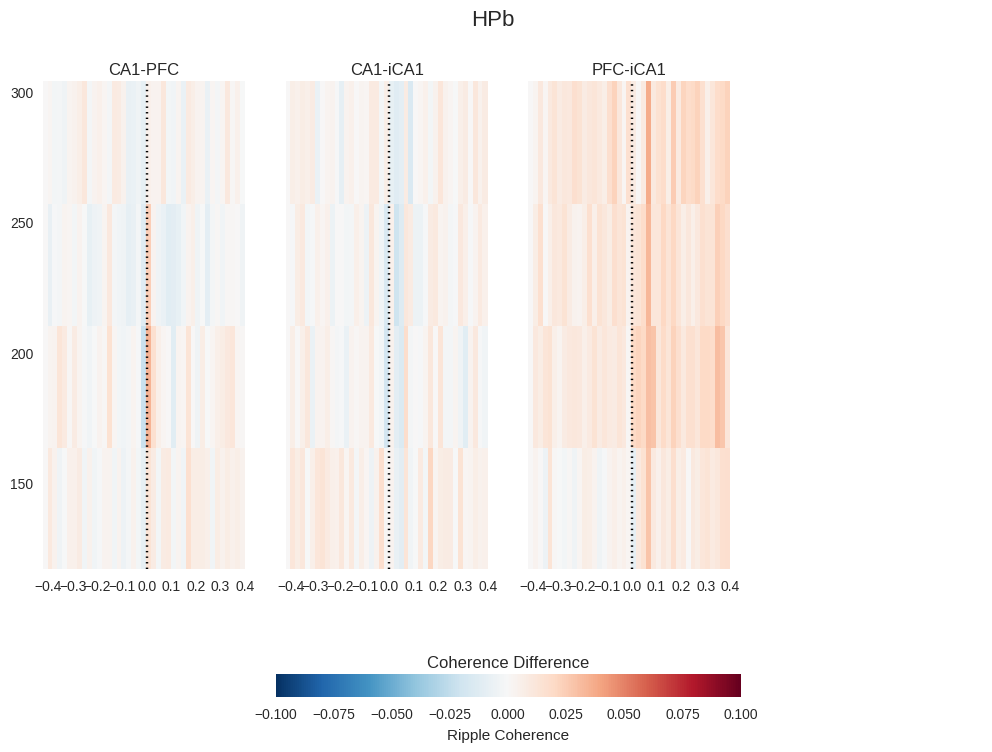

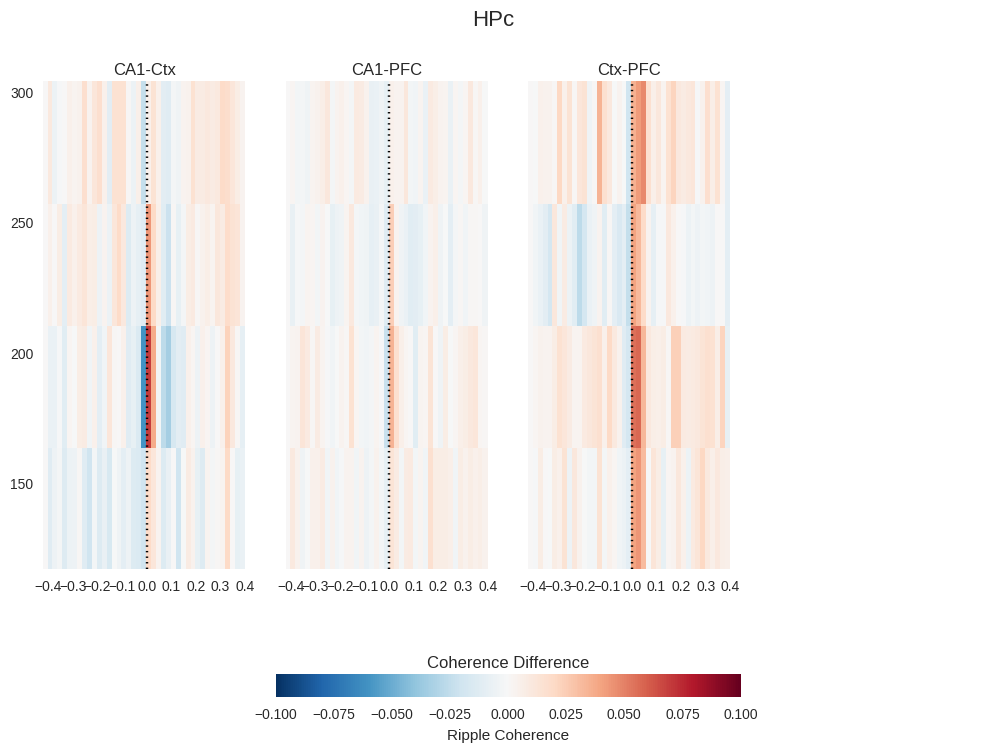

In [10]:
path = ('ripple_frequencies_coherence', 'all_ripples', 'ripple_difference_from_baseline')
tetrode_info = get_all_tetrode_info(path[0])
tetrode_info_by_animal = tetrode_info.groupby('animal')

for animal_name, animal_tetrode_info in tetrode_info_by_animal:
    plot_ripple_triggered_canonical_by_area(path, animal_tetrode_info, epoch_index)
    plt.suptitle(animal_name, fontsize=16)

## Group Delay

In [2]:
path = ('gamma_frequency_coherence_medFreqRes1', 'all_ripples', 'ripple_locked')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
group_coherence = get_tetrode_pair_group_from_hdf(
    tetrode_pair_info.index, path[0], path[1], path[2])

In [14]:
def get_group_delay_from_hdf(tetrode_pair_index, coherence_name,
                             covariate, level):
    return pd.Panel(
        {(tetrode1, tetrode2): group_delay_over_time(
                get_tetrode_pair_from_hdf(
                    coherence_name, covariate, level, tetrode1, tetrode2))
        for tetrode1, tetrode2 in tetrode_pair_index})

In [20]:
def plot_group_delay(path, tetrode_pair_info, col_wrap=3, figsize=(12, 9)):
    areas = sorted(
        list(set(tetrode_pair_info.area_1.unique().tolist() +
                 tetrode_pair_info.area_2.unique().tolist())))
    area_pairs = list(combinations(areas, 2))

    coherence_name, covariate, difference_level = path
    num_groups = len(area_pairs)
    num_rows = int(np.ceil(num_groups / col_wrap))

    fig, axes = plt.subplots(num_rows, col_wrap,
                             figsize=figsize,
                             sharex=True, sharey=True)
    axes = axes.flatten()

    for pair_ind, (area1, area2) in enumerate(area_pairs):
        index1 = tetrode_pair_info.loc[
            (tetrode_pair_info.area_1 == area1) &
            (tetrode_pair_info.area_2 == area2), :].index
        index2 = tetrode_pair_info.loc[
            (tetrode_pair_info.area_1 == area2) &
            (tetrode_pair_info.area_2 == area1), :].index
        slope1 = get_group_delay_from_hdf(index1, *path)
        slope2 = get_group_delay_from_hdf(index2, *path)
        if (len(slope1) > 0) and (len(slope2) > 0):
            combined_slopes = (slope1.loc[:, :, ['delay']]
                               .join(-1 * slope2.loc[:, :, ['delay']]))
        elif len(slope1) > 0:
            combined_slopes = slope1.loc[:, :, ['delay']]
        elif len(slope2) > 0:
            combined_slopes = slope2.loc[:, :, ['delay']]
        else:
            axes[pair_ind].set_title('-'.join(area_pairs[pair_ind]))
            continue
        combined_slopes.mean(axis=0).plot(ax=axes[pair_ind])
        axes[pair_ind].set_title('-'.join(area_pairs[pair_ind]))
        axes[pair_ind].axvline(0, color='black', linestyle=':')
        axes[pair_ind].axhline(0, color='black', linestyle=':')

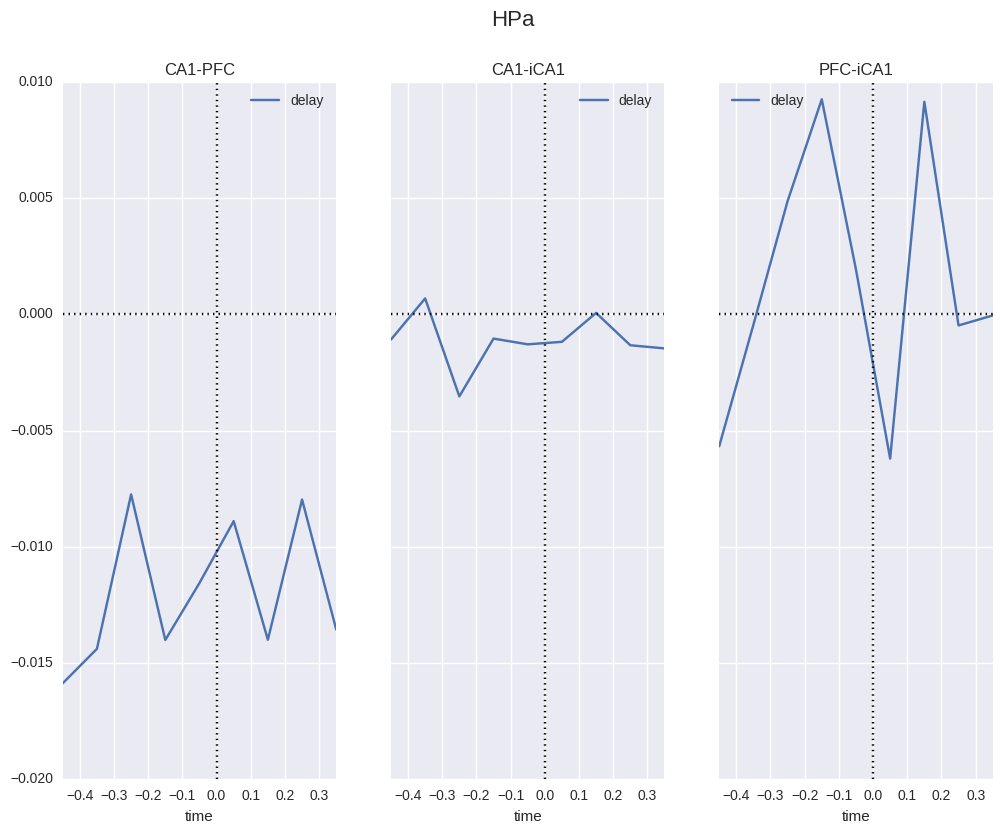

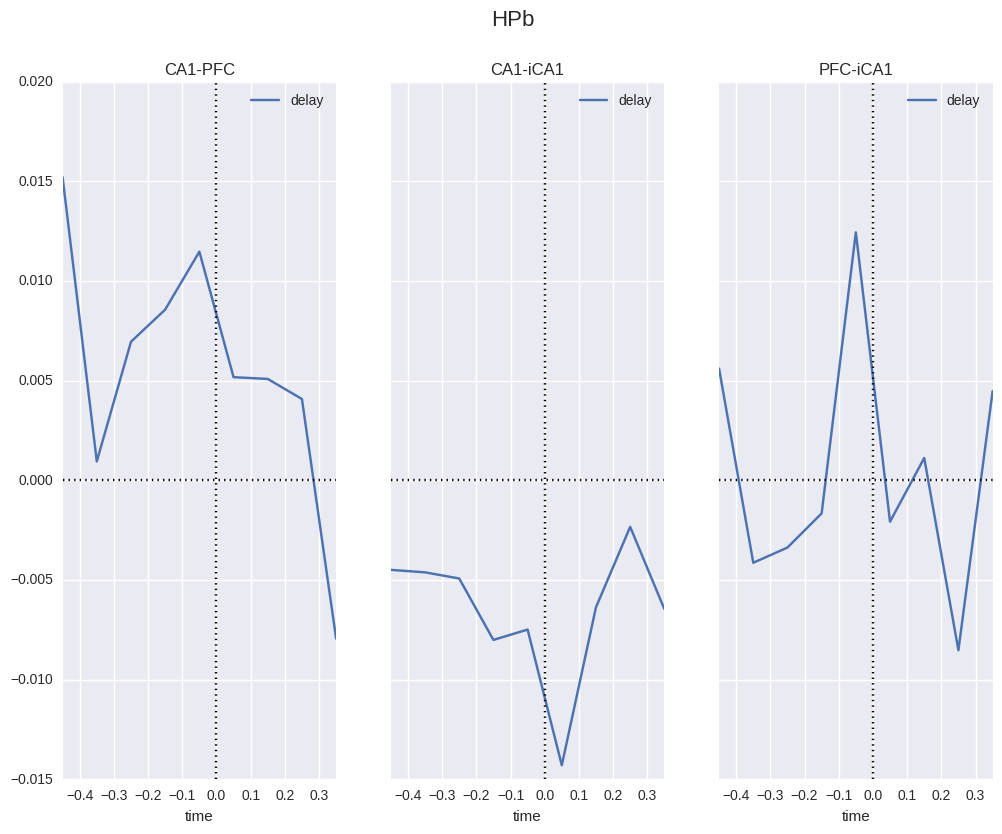

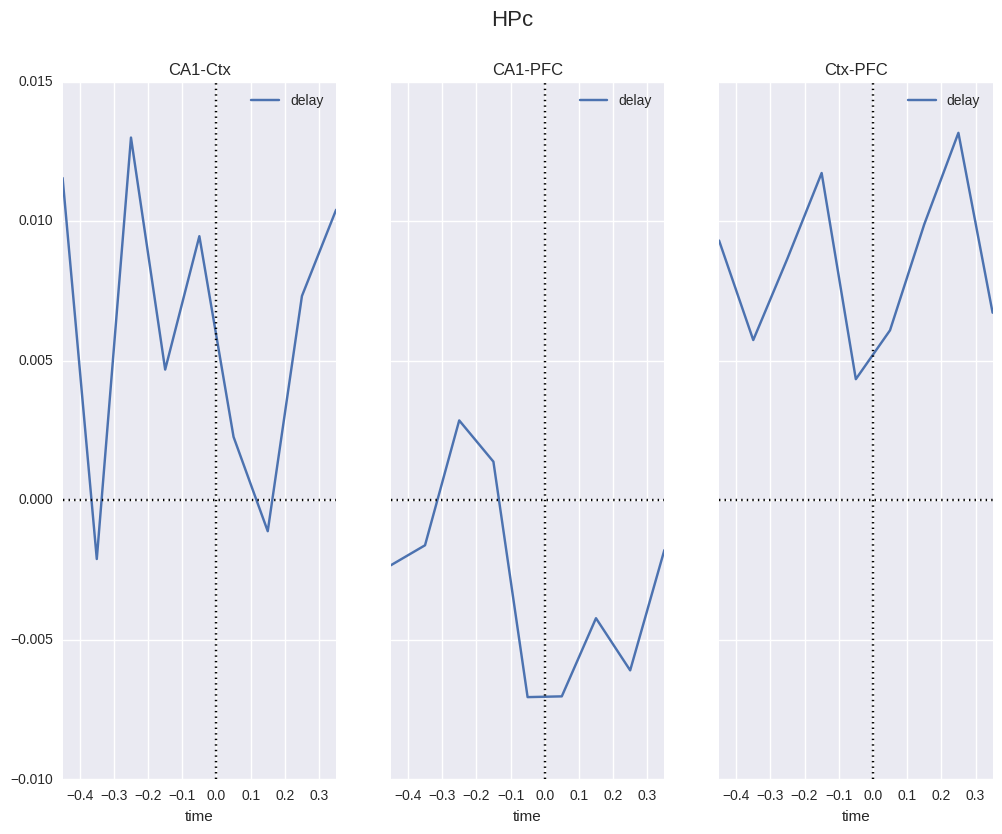

In [22]:
path = ('gamma_frequency_coherence_medFreqRes1', 'all_ripples', 'ripple_locked')
tetrode_pair_info = get_all_tetrode_pair_info(path[0])
tetrode_pairs_by_animal = tetrode_pair_info.groupby('animal')

for animal_name, animal_tetrode_pairs in tetrode_pairs_by_animal:
    plot_group_delay(path, animal_tetrode_pairs)
    plt.suptitle(animal_name, fontsize=16)